# LSTM for Bangla Sign Language - NewDataset Sarborno

## Comprehensive Setup and Dependencies Installation

This notebook implements LSTM (Long Short-Term Memory) neural networks for Bangla Sign Language recognition using the `NewDataset_sarborno_cleaned_combined.csv` dataset.

### 🎯 What we'll accomplish:
- Install all required dependencies for deep learning
- Load and preprocess the sarborno dataset  
- Build and train LSTM model
- Evaluate performance and create visualizations

- Compare with SVM results (99.54% accuracy)

### 📊 Dataset: NewDataset Sarborno (Bangla Vowels)
- Contains cleaned sensor data for Bangla vowel characters
- Features: Position (p1-p5) and Rotation (r1-r5) sensor values
- Target: Bangla sarborno characters (অ, আ, ই, উ, এ, ও, etc.)

In [94]:
# 🔧 STEP 1: Install Core Dependencies for LSTM Deep Learning
import sys
import subprocess
import pkg_resources
import importlib

def install_package(package_name, import_name=None):
    """Install a package and verify import"""
    try:
        if import_name:
            importlib.import_module(import_name)
            print(f"✅ {package_name} already installed and working")
        else:
            pkg_resources.get_distribution(package_name)
            print(f"✅ {package_name} already installed")
    except (pkg_resources.DistributionNotFound, ImportError):
        print(f"📦 Installing {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"✅ {package_name} installed successfully!")

print("🚀 INSTALLING LSTM DEEP LEARNING DEPENDENCIES")
print("=" * 55)

# Core dependencies for LSTM and deep learning
dependencies = [
    ("tensorflow", "tensorflow"),
    ("keras", "keras"), 
    ("numpy", "numpy"),
    ("pandas", "pandas"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scikit-learn", "sklearn"),
    ("plotly", "plotly"),
    ("ipywidgets", "ipywidgets"),
]

# Install each dependency
for package, import_name in dependencies:
    install_package(package, import_name)

print("\n🎉 ALL CORE DEPENDENCIES INSTALLED SUCCESSFULLY!")
print("=" * 50)

🚀 INSTALLING LSTM DEEP LEARNING DEPENDENCIES
✅ tensorflow already installed and working
✅ keras already installed and working
✅ numpy already installed and working
✅ pandas already installed and working
✅ matplotlib already installed and working
✅ seaborn already installed and working
✅ scikit-learn already installed and working
✅ plotly already installed and working
✅ ipywidgets already installed and working

🎉 ALL CORE DEPENDENCIES INSTALLED SUCCESSFULLY!


In [97]:
# 🔧 STEP 2: Install Additional Deep Learning and Visualization Libraries
print("📦 INSTALLING ADDITIONAL DEEP LEARNING LIBRARIES")
print("=" * 50)

# Additional specialized libraries
additional_deps = [
    # Note: tensorflow-gpu is deprecated since TensorFlow 2.x - GPU support is in main tensorflow package
    ("keras-tuner", "keras_tuner"),  # For hyperparameter tuning
    ("tensorboard", "tensorboard"),  # For monitoring training
    ("pillow", "PIL"),  # Image processing
    ("opencv-python", "cv2"),  # Computer vision
    ("tqdm", "tqdm"),  # Progress bars
]

# Install additional dependencies with error handling
for package, import_name in additional_deps:
    try:
        install_package(package, import_name)
    except Exception as e:
        print(f"⚠️ Optional package {package} failed to install: {e}")
        print(f"   This is optional and won't affect core functionality")

print("\n✅ ADDITIONAL LIBRARIES INSTALLATION COMPLETED!")
print("=" * 50)

📦 INSTALLING ADDITIONAL DEEP LEARNING LIBRARIES
✅ keras-tuner already installed and working
✅ tensorboard already installed and working
✅ pillow already installed and working
✅ opencv-python already installed and working
✅ tqdm already installed and working

✅ ADDITIONAL LIBRARIES INSTALLATION COMPLETED!


In [99]:
# 🎯 GPU SUPPORT CHECK
print("🎯 CHECKING GPU SUPPORT IN TENSORFLOW")
print("=" * 50)

try:
    import tensorflow as tf
    
    # Check TensorFlow version
    print(f"📦 TensorFlow version: {tf.__version__}")
    
    # Check if GPU is available
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        print(f"✅ GPU Support: Available")
        print(f"🎮 GPU Devices found: {len(physical_devices)}")
        for i, device in enumerate(physical_devices):
            print(f"   GPU {i}: {device}")
        
        # Check GPU memory growth setting
        try:
            for gpu in physical_devices:
                tf.config.experimental.set_memory_growth(gpu, True)
            print("✅ GPU memory growth enabled")
        except Exception as e:
            print(f"⚠️ Could not set memory growth: {e}")
    else:
        print("⚠️ GPU Support: Not available (using CPU)")
        print("💡 This is fine - CPU will work for your model")
    
    # Check if CUDA is available (for NVIDIA GPUs)
    if tf.test.is_built_with_cuda():
        print("✅ TensorFlow built with CUDA support")
        # Use modern GPU detection instead of deprecated method
        if physical_devices:
            print("✅ GPU computation available")
        else:
            print("⚠️ GPU not accessible (no GPU devices found)")
    else:
        print("ℹ️ TensorFlow built without CUDA (CPU-only version)")
    
except Exception as e:
    print(f"❌ Error checking GPU support: {e}")

print("=" * 50)
print("✅ GPU CHECK COMPLETED!")

🎯 CHECKING GPU SUPPORT IN TENSORFLOW
📦 TensorFlow version: 2.20.0
⚠️ GPU Support: Not available (using CPU)
💡 This is fine - CPU will work for your model
✅ TensorFlow built with CUDA support
⚠️ GPU not accessible (no GPU devices found)
✅ GPU CHECK COMPLETED!


In [100]:
# 🔧 STEP 3: Import All Required Libraries and Check Versions
import warnings
warnings.filterwarnings('ignore')

print("📚 IMPORTING AND VERIFYING ALL LIBRARIES")
print("=" * 45)

try:
    # Core Data Science Libraries
    import pandas as pd
    import numpy as np
    print(f"✅ pandas: {pd.__version__}")
    print(f"✅ numpy: {np.__version__}")
    
    # Deep Learning Libraries
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models, callbacks
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.utils import to_categorical
    print(f"✅ tensorflow: {tf.__version__}")
    print(f"✅ keras: {keras.__version__}")
    
    # Machine Learning Libraries
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import sklearn
    print(f"✅ sklearn: {sklearn.__version__}")
    
    # Visualization Libraries
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import matplotlib
    print(f"✅ matplotlib: {matplotlib.__version__}")
    print(f"✅ seaborn: {sns.__version__}")
    
    # Additional Utilities
    import os
    import sys
    import time
    from datetime import datetime
    
    # Optional libraries (with fallback)
    try:
        from tqdm import tqdm
        print("✅ tqdm: Available for progress bars")
    except ImportError:
        print("⚠️ tqdm: Not available (optional)")
    
    try:
        import keras_tuner as kt
        print("✅ keras-tuner: Available for hyperparameter tuning")
    except ImportError:
        print("⚠️ keras-tuner: Not available (optional)")
    
    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Configure matplotlib
    plt.style.use('seaborn-v0_8')
    
    # Configure TensorFlow
    print(f"\n🖥️ SYSTEM INFORMATION:")
    print(f"   • TensorFlow version: {tf.__version__}")
    print(f"   • GPU Available: {tf.config.list_physical_devices('GPU')}")
    print(f"   • Python version: {sys.version}")
    
    print("\n🎉 ALL LIBRARIES IMPORTED SUCCESSFULLY!")
    print("✅ Ready for LSTM implementation!")
    
except ImportError as e:
    print(f"❌ Import Error: {e}")
    print("Please run the previous installation cells first!")
except Exception as e:
    print(f"❌ Unexpected Error: {e}")

print("\n" + "=" * 50)

📚 IMPORTING AND VERIFYING ALL LIBRARIES
✅ pandas: 2.3.2
✅ numpy: 2.2.6
✅ tensorflow: 2.20.0
✅ keras: 3.11.3
✅ sklearn: 1.7.1
✅ matplotlib: 3.10.6
✅ seaborn: 0.13.2
✅ tqdm: Available for progress bars
✅ keras-tuner: Available for hyperparameter tuning

🖥️ SYSTEM INFORMATION:
   • TensorFlow version: 2.20.0
   • GPU Available: []
   • Python version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]

🎉 ALL LIBRARIES IMPORTED SUCCESSFULLY!
✅ Ready for LSTM implementation!



In [13]:
# 🔧 STEP 4: System and Environment Check
print("🖥️ SYSTEM ENVIRONMENT CHECK")
print("=" * 35)

# Check system specifications
import psutil
import platform

print(f"📊 SYSTEM SPECIFICATIONS:")
print(f"   • OS: {platform.system()} {platform.release()}")
print(f"   • Architecture: {platform.architecture()[0]}")
print(f"   • Processor: {platform.processor()}")
print(f"   • CPU Cores: {psutil.cpu_count(logical=False)} physical, {psutil.cpu_count(logical=True)} logical")

# Memory information
memory = psutil.virtual_memory()
print(f"   • RAM: {memory.total / (1024**3):.1f} GB total, {memory.available / (1024**3):.1f} GB available")

# Check TensorFlow GPU setup
print(f"\n🔧 TENSORFLOW GPU SETUP:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"   • GPU(s) Found: {len(gpus)}")
    for i, gpu in enumerate(gpus):
        print(f"     - GPU {i}: {gpu}")
    try:
        # Enable memory growth for GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("   ✅ GPU memory growth enabled")
    except Exception as e:
        print(f"   ⚠️ GPU configuration warning: {e}")
else:
    print("   • No GPU found - using CPU")
    print("   • This is fine for our dataset size!")

# Check disk space for model storage
disk_usage = psutil.disk_usage('/')
print(f"\n💾 STORAGE:")
print(f"   • Available disk space: {disk_usage.free / (1024**3):.1f} GB")

# Dataset path check
dataset_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
if os.path.exists(dataset_path):
    file_size = os.path.getsize(dataset_path) / (1024**2)
    print(f"   • Dataset file: ✅ Found ({file_size:.2f} MB)")
else:
    print(f"   • Dataset file: ❌ Not found at {dataset_path}")

print("\n✅ ENVIRONMENT CHECK COMPLETED!")
print("🚀 Ready to proceed with LSTM implementation!")
print("=" * 50)

🖥️ SYSTEM ENVIRONMENT CHECK
📊 SYSTEM SPECIFICATIONS:
   • OS: Linux 6.8.0-84-generic
   • Architecture: 64bit
   • Processor: x86_64
   • CPU Cores: 4 physical, 8 logical
   • RAM: 23.2 GB total, 14.6 GB available

🔧 TENSORFLOW GPU SETUP:
   • No GPU found - using CPU
   • This is fine for our dataset size!

💾 STORAGE:
   • Available disk space: 190.4 GB
   • Dataset file: ✅ Found (0.40 MB)

✅ ENVIRONMENT CHECK COMPLETED!
🚀 Ready to proceed with LSTM implementation!


# 📊 LSTM Implementation for NewDataset Sarborno

## 🎯 Dataset Overview
The `NewDataset_sarborno_cleaned_combined.csv` contains cleaned sensor data for Bangla vowel characters (sarborno). We'll implement a sophisticated LSTM model to recognize these vowel patterns.

### 🧠 LSTM Architecture Plan:
- **Input Layer**: 10 sensor features (p1-p5, r1-r5)
- **LSTM Layers**: Multi-layer LSTM with attention mechanism
- **Output Layer**: Classification for Bangla vowel characters
- **Target**: Beat the SVM benchmark of 99.54% accuracy

In [101]:
# 📂 STEP 1: Load NewDataset Sarborno Dataset
print("📂 LOADING NEWDATASET SARBORNO FOR LSTM ANALYSIS")
print("=" * 55)

# Dataset path
dataset_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'

try:
    # Load the sarborno dataset
    sarborno_df = pd.read_csv(dataset_path)
    print(f"✅ Dataset loaded successfully!")
    
    # Basic information
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"   • Dataset shape: {sarborno_df.shape}")
    print(f"   • Features: {sarborno_df.shape[1] - 1}")  # Excluding label
    print(f"   • Samples: {sarborno_df.shape[0]:,}")
    
    # Check columns
    print(f"\n📋 COLUMNS:")
    print(f"   • All columns: {list(sarborno_df.columns)}")
    
    # Feature columns (assuming p1-p5, r1-r5)
    feature_columns = [col for col in sarborno_df.columns if col != 'label']
    print(f"   • Feature columns: {feature_columns}")
    print(f"   • Target column: label")
    
    # Check for missing values
    missing_values = sarborno_df.isnull().sum().sum()
    print(f"\n🔍 DATA QUALITY:")
    print(f"   • Missing values: {missing_values}")
    print(f"   • Data types: {sarborno_df.dtypes.unique()}")
    
    # Label distribution
    if 'label' in sarborno_df.columns:
        label_counts = sarborno_df['label'].value_counts().sort_index()
        print(f"\n🏷️  LABEL DISTRIBUTION:")
        for label, count in label_counts.items():
            print(f"   • '{label}': {count:,} samples ({count/len(sarborno_df)*100:.1f}%)")
        print(f"   • Total unique labels: {sarborno_df['label'].nunique()}")
    
    # Display sample data
    print(f"\n📋 SAMPLE DATA:")
    print(sarborno_df.head())
    
    print(f"\n✅ Data loading completed successfully!")
    
except FileNotFoundError:
    print(f"❌ Error: Dataset file not found at {dataset_path}")
    print("   Please make sure the file exists and path is correct.")
except Exception as e:
    print(f"❌ Error loading dataset: {str(e)}")

print("\n" + "=" * 55)

📂 LOADING NEWDATASET SARBORNO FOR LSTM ANALYSIS
✅ Dataset loaded successfully!

📊 DATASET OVERVIEW:
   • Dataset shape: (6528, 11)
   • Features: 10
   • Samples: 6,528

📋 COLUMNS:
   • All columns: ['label', 'p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
   • Feature columns: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
   • Target column: label

🔍 DATA QUALITY:
   • Missing values: 0
   • Data types: [dtype('O') dtype('float64')]

🏷️  LABEL DISTRIBUTION:
   • ' ': 1,114 samples (17.1%)
   • '|': 1,094 samples (16.8%)
   • 'অ': 597 samples (9.1%)
   • 'আ': 343 samples (5.3%)
   • 'ই': 487 samples (7.5%)
   • 'উ': 416 samples (6.4%)
   • 'ঋ': 427 samples (6.5%)
   • 'এ': 512 samples (7.8%)
   • 'ঐ': 527 samples (8.1%)
   • 'ও': 509 samples (7.8%)
   • 'ঔ': 502 samples (7.7%)
   • Total unique labels: 11

📋 SAMPLE DATA:
  label    p1    p2    p3    p4    p5     r1     r2    r3     r4     r5
0     অ -2.48 -6.39  1.10 -3.82 -7.33 -88.17 -21.17 -1.14  12.70  16

In [7]:
# 🔧 STEP 2: Data Preprocessing for LSTM
print("🔧 DATA PREPROCESSING FOR LSTM")
print("=" * 35)

if 'sarborno_df' in locals() and not sarborno_df.empty:
    # Create a copy for processing
    df_processed = sarborno_df.copy()
    
    # Identify feature and target columns
    if 'label' in df_processed.columns:
        target_col = 'label'
        feature_cols = [col for col in df_processed.columns if col != target_col]
    else:
        # Auto-detect target column (likely the last non-numeric or categorical column)
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        feature_cols = list(numeric_cols)
        target_col = [col for col in df_processed.columns if col not in feature_cols][0]
    
    print(f"📊 FEATURE IDENTIFICATION:")
    print(f"   • Feature columns ({len(feature_cols)}): {feature_cols}")
    print(f"   • Target column: {target_col}")
    
    # Extract features and target
    X_sarborno = df_processed[feature_cols].copy()
    y_sarborno = df_processed[target_col].copy()
    
    print(f"\n🔍 DATA SHAPES:")
    print(f"   • Features (X): {X_sarborno.shape}")
    print(f"   • Target (y): {y_sarborno.shape}")
    
    # Check data types and convert if necessary
    print(f"\n🔧 DATA TYPE CONVERSION:")
    for col in feature_cols:
        if X_sarborno[col].dtype == 'object':
            print(f"   • Converting {col} from object to numeric")
            X_sarborno[col] = pd.to_numeric(X_sarborno[col], errors='coerce')
    
    # Handle missing values
    missing_before = X_sarborno.isnull().sum().sum()
    if missing_before > 0:
        print(f"   • Handling {missing_before} missing values...")
        X_sarborno = X_sarborno.fillna(X_sarborno.median())
    
    # Check for infinite values
    inf_values = np.isinf(X_sarborno).sum().sum()
    if inf_values > 0:
        print(f"   • Replacing {inf_values} infinite values...")
        X_sarborno = X_sarborno.replace([np.inf, -np.inf], np.nan)
        X_sarborno = X_sarborno.fillna(X_sarborno.median())
    
    # Label encoding for target
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_sarborno)
    
    print(f"\n🏷️  LABEL ENCODING:")
    print(f"   • Original labels: {label_encoder.classes_}")
    print(f"   • Encoded labels: {np.unique(y_encoded)}")
    print(f"   • Number of classes: {len(label_encoder.classes_)}")
    
    # Feature scaling for LSTM (important for neural networks)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sarborno)
    
    print(f"\n📊 FEATURE SCALING:")
    print(f"   • Scaling method: StandardScaler")
    print(f"   • Feature range before: [{X_sarborno.min().min():.3f}, {X_sarborno.max().max():.3f}]")
    print(f"   • Feature range after: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")
    
    # For LSTM, we need to reshape data to include sequence dimension
    # Since we don't have time series data, we'll treat each sample as a sequence of length 1
    X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
    
    print(f"\n🔄 LSTM RESHAPING:")
    print(f"   • Original shape: {X_scaled.shape}")
    print(f"   • LSTM input shape: {X_lstm.shape} (samples, timesteps, features)")
    
    # Convert labels to categorical for multi-class classification
    num_classes = len(label_encoder.classes_)
    y_categorical = to_categorical(y_encoded, num_classes=num_classes)
    
    print(f"\n🎯 CATEGORICAL ENCODING:")
    print(f"   • One-hot encoded shape: {y_categorical.shape}")
    print(f"   • Number of classes: {num_classes}")
    
    # Split the data
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
        X_lstm, y_categorical, 
        test_size=0.3, 
        random_state=42,
        stratify=y_encoded
    )
    
    print(f"\n📊 TRAIN/TEST SPLIT:")
    print(f"   • Training set: {X_train_lstm.shape[0]} samples")
    print(f"   • Test set: {X_test_lstm.shape[0]} samples")
    print(f"   • Training features shape: {X_train_lstm.shape}")
    print(f"   • Test features shape: {X_test_lstm.shape}")
    
    print(f"\n✅ DATA PREPROCESSING COMPLETED!")
    print(f"   🎯 Ready for LSTM model training!")
    
else:
    print("❌ Sarborno dataset not loaded. Please run the previous cell first.")

print("\n" + "=" * 35)

🔧 DATA PREPROCESSING FOR LSTM
📊 FEATURE IDENTIFICATION:
   • Feature columns (10): ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
   • Target column: label

🔍 DATA SHAPES:
   • Features (X): (6528, 10)
   • Target (y): (6528,)

🔧 DATA TYPE CONVERSION:

🏷️  LABEL ENCODING:
   • Original labels: [' ' '|' 'অ' 'আ' 'ই' 'উ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ']
   • Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10]
   • Number of classes: 11

📊 FEATURE IDENTIFICATION:
   • Feature columns (10): ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
   • Target column: label

🔍 DATA SHAPES:
   • Features (X): (6528, 10)
   • Target (y): (6528,)

🔧 DATA TYPE CONVERSION:

🏷️  LABEL ENCODING:
   • Original labels: [' ' '|' 'অ' 'আ' 'ই' 'উ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ']
   • Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10]
   • Number of classes: 11

📊 FEATURE SCALING:
   • Scaling method: StandardScaler
   • Feature range before: [-144.680, 164.100]
   • Feature range after: [-4.997, 5.495]

🔄 LSTM 

In [102]:
# 🧠 STEP 3: Build Advanced LSTM Model Architecture
print("🧠 BUILDING ADVANCED LSTM MODEL")
print("=" * 35)

if 'X_train_lstm' in locals():
    # Model configuration
    input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])  # (timesteps, features)
    num_classes = y_train_lstm.shape[1]
    
    print(f"🏗️  MODEL CONFIGURATION:")
    print(f"   • Input shape: {input_shape}")
    print(f"   • Number of classes: {num_classes}")
    print(f"   • Classes: {list(label_encoder.classes_)}")
    
    # Create the LSTM model
    def create_lstm_model(input_shape, num_classes, lstm_units=[128, 64], dropout_rate=0.3):
        """
        Create an advanced LSTM model for sign language recognition
        """
        model = Sequential([
            # Input layer
            keras.Input(shape=input_shape),
            
            # First LSTM layer with return sequences
            LSTM(lstm_units[0], return_sequences=True, activation='tanh'),
            BatchNormalization(),
            Dropout(dropout_rate),
            
            # Second LSTM layer
            LSTM(lstm_units[1], return_sequences=False, activation='tanh'),
            BatchNormalization(),
            Dropout(dropout_rate),
            
            # Dense layers for classification
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(dropout_rate/2),
            
            Dense(32, activation='relu'),
            Dropout(dropout_rate/2),
            
            # Output layer
            Dense(num_classes, activation='softmax')
        ])
        
        return model
    
    # Create the model
    lstm_model = create_lstm_model(input_shape, num_classes)
    
    # Display model architecture
    print(f"\n🏗️  LSTM MODEL ARCHITECTURE:")
    lstm_model.summary()
    
    # Compile the model with appropriate optimizer and loss function
    lstm_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    print(f"\n⚙️  MODEL COMPILATION:")
    print(f"   • Optimizer: Adam (lr=0.001)")
    print(f"   • Loss function: categorical_crossentropy")
    print(f"   • Metrics: accuracy, precision, recall")
    
    # Calculate model parameters
    trainable_params = lstm_model.count_params()
    print(f"   • Trainable parameters: {trainable_params:,}")
    
    print(f"\n✅ LSTM MODEL CREATED SUCCESSFULLY!")
    
else:
    print("❌ Training data not available. Please run preprocessing first.")

print("\n" + "=" * 35)

🧠 BUILDING ADVANCED LSTM MODEL
🏗️  MODEL CONFIGURATION:
   • Input shape: (1, 10)
   • Number of classes: 11
   • Classes: [' ', '|', 'অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']

🏗️  LSTM MODEL ARCHITECTURE:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 128)         │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,203 (500.79 KB)

 Trainable params: 127,691 (498.79 KB)

 Non-trainable params: 512 (2.00 KB)


⚙️  MODEL COMPILATION:
   • Optimizer: Adam (lr=0.001)
   • Loss function: categorical_crossentropy
   • Metrics: accuracy, precision, recall
   • Trainable parameters: 128,203

✅ LSTM MODEL CREATED SUCCESSFULLY!



In [9]:
# 🚀 STEP 4: Train LSTM Model with Advanced Callbacks
print("🚀 TRAINING LSTM MODEL")
print("=" * 25)

if 'lstm_model' in locals():
    # Setup training callbacks for better training
    callbacks_list = [
        # Early stopping to prevent overfitting
        callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        
        # Reduce learning rate when plateaued
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1
        ),
        
        # Model checkpointing
        callbacks.ModelCheckpoint(
            'best_sarborno_lstm_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]
    
    print(f"⚙️  TRAINING CONFIGURATION:")
    print(f"   • Early stopping patience: 15 epochs")
    print(f"   • Learning rate reduction: factor=0.5, patience=8")
    print(f"   • Model checkpointing: best_sarborno_lstm_model.h5")
    
    # Training parameters
    batch_size = 32
    epochs = 100
    validation_split = 0.2
    
    print(f"   • Batch size: {batch_size}")
    print(f"   • Max epochs: {epochs}")
    print(f"   • Validation split: {validation_split}")
    
    print(f"\n🎯 STARTING TRAINING...")
    print(f"   Training samples: {len(X_train_lstm)}")
    print(f"   Validation samples: {int(len(X_train_lstm) * validation_split)}")
    print(f"   Test samples: {len(X_test_lstm)}")
    
    # Record training start time
    training_start_time = time.time()
    
    # Train the model
    history = lstm_model.fit(
        X_train_lstm, y_train_lstm,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=callbacks_list,
        verbose=1,
        shuffle=True
    )
    
    # Calculate training time
    training_time = time.time() - training_start_time
    
    print(f"\n⏱️  TRAINING COMPLETED!")
    print(f"   • Total training time: {training_time/60:.2f} minutes")
    print(f"   • Epochs completed: {len(history.history['loss'])}")
    
    # Get the best metrics
    best_val_accuracy = max(history.history['val_accuracy'])
    best_val_loss = min(history.history['val_loss'])
    
    print(f"   • Best validation accuracy: {best_val_accuracy:.4f} ({best_val_accuracy*100:.2f}%)")
    print(f"   • Best validation loss: {best_val_loss:.4f}")
    
    print(f"\n✅ LSTM MODEL TRAINING COMPLETED!")
    
else:
    print("❌ LSTM model not available. Please run model creation first.")

print("\n" + "=" * 25)

🚀 TRAINING LSTM MODEL
⚙️  TRAINING CONFIGURATION:
   • Early stopping patience: 15 epochs
   • Learning rate reduction: factor=0.5, patience=8
   • Model checkpointing: best_sarborno_lstm_model.h5
   • Batch size: 32
   • Max epochs: 100
   • Validation split: 0.2

🎯 STARTING TRAINING...
   Training samples: 4569
   Validation samples: 913
   Test samples: 1959
Epoch 1/100
Epoch 1/100
108/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4326 - loss: 1.7614 - precision: 0.6777 - recall: 0.2144
Epoch 1: val_accuracy improved from None to 0.23195, saving model to best_sarborno_lstm_model.h5

Epoch 1: val_accuracy improved from None to 0.23195, saving model to best_sarborno_lstm_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6629 - loss: 1.1173 - precision: 0.8859 - recall: 0.4482 - val_accuracy: 0.2319 - val_loss: 2.2675 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8836 - loss: 0.4285 - precision: 0.9302 - recall: 0.8001
Epoch 2: val_accuracy did not improve from 0.23195
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8982 - loss: 0.3574 - precision: 0.9352 - recall: 0.8372 - val_accuracy: 0.2090 - val_loss: 1.7126 - val_precision: 0.9571 - val_recall: 0.0733 - learning_rate: 0.0010
Epoch 3/100

Epoch 2: val_accuracy did not improve from 0.23195
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8982 - loss: 0.3574 - precision: 0.9352 - recall: 0.8372 - val_accuracy: 0.2090 - val_loss: 1.7126 - val_precision: 0.9571 - val_recall: 0.0733 - learning_rate: 0.0010
Epoch 3/100
110/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9348

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9398 - loss: 0.2089 - precision: 0.9553 - recall: 0.9187 - val_accuracy: 0.9037 - val_loss: 0.5431 - val_precision: 0.9710 - val_recall: 0.6969 - learning_rate: 0.0010
Epoch 4/100
Epoch 4/100
111/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9471 - loss: 0.1685 - precision: 0.9607 - recall: 0.9390
Epoch 4: val_accuracy improved from 0.90372 to 0.95733, saving model to best_sarborno_lstm_model.h5

Epoch 4: val_accuracy improved from 0.90372 to 0.95733, saving model to best_sarborno_lstm_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9543 - loss: 0.1593 - precision: 0.9637 - recall: 0.9431 - val_accuracy: 0.9573 - val_loss: 0.1401 - val_precision: 0.9654 - val_recall: 0.9475 - learning_rate: 0.0010
Epoch 5/100
Epoch 5/100
107/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9594 - loss: 0.1414 - precision: 0.9668 - recall: 0.9532
Epoch 5: val_accuracy improved from 0.95733 to 0.99344, saving model to best_sarborno_lstm_model.h5

Epoch 5: val_accuracy improved from 0.95733 to 0.99344, saving model to best_sarborno_lstm_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9614 - loss: 0.1425 - precision: 0.9694 - recall: 0.9540 - val_accuracy: 0.9934 - val_loss: 0.0290 - val_precision: 0.9934 - val_recall: 0.9923 - learning_rate: 0.0010
Epoch 6/100
Epoch 6/100
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9654 - loss: 0.1191 - precision: 0.9710 - recall: 0.9564
Epoch 6: val_accuracy improved from 0.99344 to 0.99453, saving model to best_sarborno_lstm_model.h5

Epoch 6: val_accuracy improved from 0.99344 to 0.99453, saving model to best_sarborno_lstm_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9677 - loss: 0.1132 - precision: 0.9720 - recall: 0.9603 - val_accuracy: 0.9945 - val_loss: 0.0161 - val_precision: 0.9967 - val_recall: 0.9945 - learning_rate: 0.0010
Epoch 7/100
Epoch 7/100
111/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9743 - loss: 0.1055 - precision: 0.9788 - recall: 0.9649
Epoch 7: val_accuracy improved from 0.99453 to 0.99672, saving model to best_sarborno_lstm_model.h5

Epoch 7: val_accuracy improved from 0.99453 to 0.99672, saving model to best_sarborno_lstm_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9740 - loss: 0.0951 - precision: 0.9795 - recall: 0.9680 - val_accuracy: 0.9967 - val_loss: 0.0113 - val_precision: 0.9967 - val_recall: 0.9967 - learning_rate: 0.0010
Epoch 8/100
Epoch 8/100
108/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9744 - loss: 0.0962 - precision: 0.9774 - recall: 0.9701
Epoch 8: val_accuracy did not improve from 0.99672
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9743 - loss: 0.0894 - precision: 0.9782 - recall: 0.9707 - val_accuracy: 0.9956 - val_loss: 0.0095 - val_precision: 0.9967 - val_recall: 0.9956 - learning_rate: 0.0010
Epoch 9/100

Epoch 8: val_accuracy did not improve from 0.99672
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9743 - loss: 0.0894 - precision: 0.9782 - recall: 0.9707 - val_accuracy: 0.9956 - val_loss: 0.0095 - val_precision: 0.9967 - val_recall: 0.9956 - learning_rate: 0.0010
Epoch 9/100
109/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9817 - loss: 

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9781 - loss: 0.0766 - precision: 0.9813 - recall: 0.9759 - val_accuracy: 0.9978 - val_loss: 0.0044 - val_precision: 0.9978 - val_recall: 0.9978 - learning_rate: 0.0010
Epoch 11/100
Epoch 11/100
111/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9850 - loss: 0.0668 - precision: 0.9871 - recall: 0.9820
Epoch 11: val_accuracy did not improve from 0.99781
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9833 - loss: 0.0665 - precision: 0.9862 - recall: 0.9806 - val_accuracy: 0.9967 - val_loss: 0.0070 - val_precision: 0.9967 - val_recall: 0.9967 - learning_rate: 0.0010
Epoch 12/100

Epoch 11: val_accuracy did not improve from 0.99781
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9833 - loss: 0.0665 - precision: 0.9862 - recall: 0.9806 - val_accuracy: 0.9967 - val_loss: 0.0070 - val_precision: 0.9967 - val_recall: 0.9967 - learning_rate: 0.0010
Epoch 12/100
111/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9830 - 

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9819 - loss: 0.0690 - precision: 0.9832 - recall: 0.9792 - val_accuracy: 1.0000 - val_loss: 0.0019 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 13/100
Epoch 13/100
110/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9800 - loss: 0.0711 - precision: 0.9819 - recall: 0.9781
Epoch 13: val_accuracy did not improve from 1.00000
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9808 - loss: 0.0635 - precision: 0.9827 - recall: 0.9792 - val_accuracy: 1.0000 - val_loss: 0.0032 - val_precision: 1.0000 - val_recall: 0.9989 - learning_rate: 0.0010
Epoch 14/100

Epoch 13: val_accuracy did not improve from 1.00000
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9808 - loss: 0.0635 - precision: 0.9827 - recall: 0.9792 - val_accuracy: 1.0000 - val_loss: 0.0032 - val_precision: 1.0000 - val_recall: 0.9989 - learning_rate: 0.0010
Epoch 14/100
106/115 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9803 - 

In [115]:
# 📊 STEP 5: Model Evaluation and Performance Analysis
print("📊 LSTM MODEL EVALUATION")
print("=" * 30)

if 'history' in locals() and 'lstm_model' in locals():
    # Make predictions on test set
    print("🔍 MAKING PREDICTIONS ON TEST SET...")
    y_pred_prob = lstm_model.predict(X_test_lstm, verbose=0)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_classes = np.argmax(y_test_lstm, axis=1)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
    
    print(f"\n🎯 FINAL MODEL PERFORMANCE:")
    print(f"   • Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    
    # Compare with SVM benchmark
    svm_accuracy = 0.9954  # 99.54% from previous SVM results
    improvement = (test_accuracy - svm_accuracy) * 100
    
    if test_accuracy > svm_accuracy:
        print(f"   🏆 LSTM WINS! {improvement:.2f}% better than SVM")
    elif test_accuracy == svm_accuracy:
        print(f"   🤝 TIED! Same performance as SVM")
    else:
        print(f"   📊 SVM still better by {abs(improvement):.2f}%")
    
    print(f"   • SVM Benchmark: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
    
    # Detailed classification report
    class_names = label_encoder.classes_
    print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
    print("-" * 50)
    
    from sklearn.metrics import classification_report
    report = classification_report(
        y_true_classes, y_pred_classes,
        target_names=class_names,
        output_dict=True,
        zero_division=0
    )
    
    # Print class-wise performance
    for class_name in class_names:
        if class_name in report:
            metrics = report[class_name]
            print(f"Class '{class_name}':")
            print(f"   • Precision: {metrics['precision']:.3f}")
            print(f"   • Recall: {metrics['recall']:.3f}")
            print(f"   • F1-Score: {metrics['f1-score']:.3f}")
            print(f"   • Support: {int(metrics['support'])}")
            print()
    
    # Overall metrics
    print("Overall Performance:")
    print(f"   • Macro Avg F1: {report['macro avg']['f1-score']:.3f}")
    print(f"   • Weighted Avg F1: {report['weighted avg']['f1-score']:.3f}")
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    
    print(f"\n📊 CONFUSION MATRIX:")
    print("True\\Pred", end="  ")
    for cls in class_names:
        print(f"{cls:>4}", end="")
    print()
    
    for i, true_cls in enumerate(class_names):
        print(f"{true_cls:>8}  ", end="")
        for j in range(len(class_names)):
            print(f"{cm[i,j]:>4}", end="")
        print()
    
    # Training history summary (check if history is Keras History object)
    if hasattr(history, 'history') and isinstance(history.history, dict):
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        
        print(f"\n📈 TRAINING SUMMARY:")
        print(f"   • Final training accuracy: {final_train_acc:.4f}")
        print(f"   • Final validation accuracy: {final_val_acc:.4f}")
        print(f"   • Test accuracy: {test_accuracy:.4f}")
        
        # Check for overfitting
        overfit_gap = final_train_acc - test_accuracy
        if overfit_gap > 0.05:  # 5% gap threshold
            print(f"   ⚠️ Possible overfitting detected (gap: {overfit_gap:.3f})")
        else:
            print(f"   ✅ Good generalization (gap: {overfit_gap:.3f})")
    else:
        print(f"\n📈 TRAINING SUMMARY:")
        print(f"   • Training history not available (variable overwritten)")
        print(f"   • Test accuracy: {test_accuracy:.4f}")
        print(f"   ✅ Model evaluation completed successfully")
    
    print(f"\n✅ MODEL EVALUATION COMPLETED!")
    
else:
    print("❌ Model training results not available. Please run training first.")

print("\n" + "=" * 30)

📊 LSTM MODEL EVALUATION
🔍 MAKING PREDICTIONS ON TEST SET...

🎯 FINAL MODEL PERFORMANCE:
   • Test Accuracy: 0.9964 (99.64%)
   🏆 LSTM WINS! 0.10% better than SVM
   • SVM Benchmark: 0.9954 (99.54%)

📋 DETAILED CLASSIFICATION REPORT:
--------------------------------------------------
Class ' ':
   • Precision: 1.000
   • Recall: 1.000
   • F1-Score: 1.000
   • Support: 334

Class '|':
   • Precision: 1.000
   • Recall: 0.988
   • F1-Score: 0.994
   • Support: 328

Class 'অ':
   • Precision: 0.994
   • Recall: 1.000
   • F1-Score: 0.997
   • Support: 179

Class 'আ':
   • Precision: 1.000
   • Recall: 1.000
   • F1-Score: 1.000
   • Support: 103

Class 'ই':
   • Precision: 1.000
   • Recall: 0.993
   • F1-Score: 0.997
   • Support: 146

Class 'উ':
   • Precision: 1.000
   • Recall: 1.000
   • F1-Score: 1.000
   • Support: 125

Class 'ঋ':
   • Precision: 1.000
   • Recall: 1.000
   • F1-Score: 1.000
   • Support: 128

Class 'এ':
   • Precision: 0.994
   • Recall: 0.994
   • F1-Score: 0.994

In [106]:
# 🔍 MODEL DIAGNOSTIC AND DEBUGGING
print("🔍 LSTM MODEL DIAGNOSTIC")
print("=" * 40)

# Check if model and data are available
if 'lstm_model' in locals() and 'X_test_lstm' in locals():
    print("✅ Model and test data available")
    
    # Check model structure
    print(f"\n🏗️ MODEL ARCHITECTURE:")
    print(f"   • Input shape: {lstm_model.input_shape}")
    print(f"   • Output shape: {lstm_model.output_shape}")
    print(f"   • Total parameters: {lstm_model.count_params():,}")
    
    # Check data shapes
    print(f"\n📊 DATA SHAPES:")
    print(f"   • X_test_lstm shape: {X_test_lstm.shape}")
    print(f"   • y_test_lstm shape: {y_test_lstm.shape}")
    
    # Sample a few predictions to see what's happening
    print(f"\n🔍 SAMPLE PREDICTIONS:")
    sample_predictions = lstm_model.predict(X_test_lstm[:5], verbose=0)
    
    for i in range(5):
        true_class = np.argmax(y_test_lstm[i])
        pred_class = np.argmax(sample_predictions[i])
        true_char = label_encoder.inverse_transform([true_class])[0]
        pred_char = label_encoder.inverse_transform([pred_class])[0]
        confidence = sample_predictions[i][pred_class]
        
        print(f"   Sample {i+1}: True='{true_char}' | Pred='{pred_char}' | Conf={confidence:.3f}")
    
    # Check class distribution in predictions
    print(f"\n📈 PREDICTION DISTRIBUTION:")
    all_predictions = lstm_model.predict(X_test_lstm, verbose=0)
    pred_classes = np.argmax(all_predictions, axis=1)
    
    from collections import Counter
    pred_counts = Counter(pred_classes)
    
    for class_idx, count in pred_counts.most_common():
        class_name = label_encoder.inverse_transform([class_idx])[0]
        percentage = (count / len(pred_classes)) * 100
        print(f"   '{class_name}': {count} ({percentage:.1f}%)")
    
    # Check if model is always predicting the same class
    unique_predictions = len(set(pred_classes))
    print(f"\n🎯 PREDICTION DIVERSITY:")
    print(f"   • Unique classes predicted: {unique_predictions}/{len(label_encoder.classes_)}")
    
    if unique_predictions < 3:
        print("   ⚠️ WARNING: Model is predicting very few classes!")
        print("   💡 This suggests training issues - model may need retraining")
    
    # Check confidence scores
    max_confidences = np.max(all_predictions, axis=1)
    avg_confidence = np.mean(max_confidences)
    print(f"   • Average confidence: {avg_confidence:.3f}")
    
    if avg_confidence > 0.9:
        print("   ⚠️ Very high confidence but low accuracy suggests overfitting")
    elif avg_confidence < 0.3:
        print("   ⚠️ Very low confidence suggests undertrained model")
    
else:
    print("❌ Model or test data not available")

print("=" * 40)

🔍 LSTM MODEL DIAGNOSTIC
✅ Model and test data available

🏗️ MODEL ARCHITECTURE:
   • Input shape: (None, 1, 10)
   • Output shape: (None, 11)
   • Total parameters: 128,203

📊 DATA SHAPES:
   • X_test_lstm shape: (1959, 1, 10)
   • y_test_lstm shape: (1959, 11)

🔍 SAMPLE PREDICTIONS:
   Sample 1: True='ই' | Pred='এ' | Conf=0.093
   Sample 2: True='এ' | Pred='এ' | Conf=0.092
   Sample 3: True=' ' | Pred='এ' | Conf=0.092
   Sample 4: True='|' | Pred='ঔ' | Conf=0.091
   Sample 5: True=' ' | Pred='ঔ' | Conf=0.092

📈 PREDICTION DISTRIBUTION:
   'ঔ': 640 (32.7%)
   ' ': 466 (23.8%)
   'এ': 420 (21.4%)
   'ও': 380 (19.4%)
   '|': 49 (2.5%)
   'উ': 4 (0.2%)

🎯 PREDICTION DIVERSITY:
   • Unique classes predicted: 6/11
   • Average confidence: 0.092
   ⚠️ Very low confidence suggests undertrained model


In [113]:
# 🚨 COMPREHENSIVE MODEL DIAGNOSTIC - WHY IS PERFORMANCE SO BAD?
print("🚨 DIAGNOSING POOR MODEL PERFORMANCE")
print("=" * 50)

# 1. Check if model was actually trained
print("1. MODEL TRAINING STATUS:")
print(f"   • Model exists: {'lstm_model' in locals()}")
print(f"   • Model compiled: {lstm_model.compiled if 'lstm_model' in locals() else 'N/A'}")
print(f"   • Model trained: {'history' in locals()}")

# 2. Check data preprocessing
print(f"\n2. DATA PREPROCESSING CHECK:")
print(f"   • X_train_lstm shape: {X_train_lstm.shape}")
print(f"   • y_train_lstm shape: {y_train_lstm.shape}")
print(f"   • X_test_lstm shape: {X_test_lstm.shape}")
print(f"   • y_test_lstm shape: {y_test_lstm.shape}")

# Check for NaN or infinite values
print(f"   • X_train has NaN: {np.isnan(X_train_lstm).sum()}")
print(f"   • X_train has Inf: {np.isinf(X_train_lstm).sum()}")
print(f"   • y_train has NaN: {np.isnan(y_train_lstm).sum()}")

# 3. Check class distribution in training data
print(f"\n3. CLASS DISTRIBUTION IN TRAINING DATA:")
y_train_classes = np.argmax(y_train_lstm, axis=1)
from collections import Counter
train_class_counts = Counter(y_train_classes)

total_train = len(y_train_classes)
for class_idx, count in sorted(train_class_counts.items()):
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = (count / total_train) * 100
    print(f"   '{class_name}': {count:4d} samples ({percentage:5.1f}%)")

# Check for severe class imbalance
min_count = min(train_class_counts.values())
max_count = max(train_class_counts.values())
imbalance_ratio = max_count / min_count
print(f"   • Imbalance ratio: {imbalance_ratio:.1f}:1 ({'SEVERE' if imbalance_ratio > 10 else 'OK'})")

# 4. Check input data scaling
print(f"\n4. INPUT DATA SCALING CHECK:")
print(f"   • X_train min: {X_train_lstm.min():.3f}")
print(f"   • X_train max: {X_train_lstm.max():.3f}")
print(f"   • X_train mean: {X_train_lstm.mean():.3f}")
print(f"   • X_train std: {X_train_lstm.std():.3f}")

# Check if data is properly normalized
if X_train_lstm.std() > 10 or abs(X_train_lstm.mean()) > 5:
    print("   ⚠️ WARNING: Data may not be properly normalized!")

# 5. Check model weights
print(f"\n5. MODEL WEIGHTS CHECK:")
first_layer_weights = lstm_model.layers[0].get_weights()[0] if lstm_model.layers else None
if first_layer_weights is not None:
    print(f"   • First layer weight range: [{first_layer_weights.min():.3f}, {first_layer_weights.max():.3f}]")
    print(f"   • First layer weight mean: {first_layer_weights.mean():.3f}")
    if abs(first_layer_weights.mean()) < 0.001 and first_layer_weights.std() < 0.01:
        print("   ⚠️ WARNING: Weights seem too small - possible gradient vanishing!")
else:
    print("   ❌ Cannot access model weights")

# 6. Check model predictions pattern
print(f"\n6. MODEL PREDICTION PATTERN:")
sample_preds = lstm_model.predict(X_test_lstm[:100], verbose=0)
pred_entropies = -np.sum(sample_preds * np.log(sample_preds + 1e-10), axis=1)
avg_entropy = np.mean(pred_entropies)
print(f"   • Average prediction entropy: {avg_entropy:.3f}")
print(f"   • Max possible entropy: {np.log(len(label_encoder.classes_)):.3f}")

if avg_entropy < 0.5:
    print("   ⚠️ WARNING: Model predictions are too confident (overconfident/overfitting)")
elif avg_entropy > 2.0:
    print("   ⚠️ WARNING: Model predictions are random (undertrained)")

# 7. Quick training diagnosis
print(f"\n7. POSSIBLE CAUSES OF POOR PERFORMANCE:")
causes = []

if imbalance_ratio > 20:
    causes.append("🔴 Severe class imbalance")
    
if X_train_lstm.std() > 10:
    causes.append("🔴 Poor data normalization")
    
if np.isnan(X_train_lstm).sum() > 0:
    causes.append("🔴 NaN values in training data")
    
if avg_entropy > 2.0:
    causes.append("🔴 Model undertrained (random predictions)")
    
if avg_entropy < 0.5:
    causes.append("🔴 Model overconfident but wrong")

if first_layer_weights is not None and first_layer_weights.std() < 0.01:
    causes.append("🔴 Vanishing gradients")

if not causes:
    causes.append("🟡 Training configuration issues")

for cause in causes:
    print(f"   {cause}")

print(f"\n8. RECOMMENDED FIXES:")
if imbalance_ratio > 20:
    print("   ✅ Use class weights in model.fit()")
    print("   ✅ Try data augmentation or SMOTE")
    
if X_train_lstm.std() > 10:
    print("   ✅ Improve data normalization/scaling")
    
if avg_entropy > 2.0:
    print("   ✅ Train for more epochs")
    print("   ✅ Reduce learning rate")
    print("   ✅ Check if model is learning at all")

print("=" * 50)

🚨 DIAGNOSING POOR MODEL PERFORMANCE
1. MODEL TRAINING STATUS:
   • Model exists: True
   • Model compiled: True
   • Model trained: True

2. DATA PREPROCESSING CHECK:
   • X_train_lstm shape: (4569, 1, 10)
   • y_train_lstm shape: (4569, 11)
   • X_test_lstm shape: (1959, 1, 10)
   • y_test_lstm shape: (1959, 11)
   • X_train has NaN: 0
   • X_train has Inf: 0
   • y_train has NaN: 0

3. CLASS DISTRIBUTION IN TRAINING DATA:
   ' ':  780 samples ( 17.1%)
   '|':  766 samples ( 16.8%)
   'অ':  418 samples (  9.1%)
   'আ':  240 samples (  5.3%)
   'ই':  341 samples (  7.5%)
   'উ':  291 samples (  6.4%)
   'ঋ':  299 samples (  6.5%)
   'এ':  358 samples (  7.8%)
   'ঐ':  369 samples (  8.1%)
   'ও':  356 samples (  7.8%)
   'ঔ':  351 samples (  7.7%)
   • Imbalance ratio: 3.2:1 (OK)

4. INPUT DATA SCALING CHECK:
   • X_train min: -4.997
   • X_train max: 5.495
   • X_train mean: -0.003
   • X_train std: 1.002

5. MODEL WEIGHTS CHECK:
   • First layer weight range: [-0.107, 0.107]
   • Fir

In [114]:
# 🔥 RETRAIN MODEL WITH PROPER CONFIGURATION
print("🔥 RETRAINING LSTM MODEL WITH BETTER SETTINGS")
print("=" * 50)

# Clear any previous training history
if 'history' in locals():
    del history

# Rebuild model with better architecture for your data
print("🏗️ REBUILDING MODEL ARCHITECTURE...")

# Create improved model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, 10), dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile with better optimizer settings
lstm_model.compile(
    optimizer=Adam(learning_rate=0.01),  # Higher learning rate to start
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model rebuilt successfully!")
print(f"   • Total parameters: {lstm_model.count_params():,}")

# Calculate class weights to handle imbalance
y_train_classes = np.argmax(y_train_lstm, axis=1)
from sklearn.utils.class_weight import compute_class_weight

class_weights_array = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)
class_weights = dict(enumerate(class_weights_array))

print(f"📊 Class weights calculated:")
for i, weight in class_weights.items():
    class_name = label_encoder.inverse_transform([i])[0]
    print(f"   '{class_name}': {weight:.2f}")

# Improved training configuration
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=25,  # More patience
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,  # Reduce more aggressively
        patience=10,
        min_lr=1e-6,
        verbose=1
    )
]

# Training parameters
batch_size = 64  # Larger batch size
epochs = 150     # More epochs
validation_split = 0.2

print(f"\n⚙️ IMPROVED TRAINING CONFIGURATION:")
print(f"   • Batch size: {batch_size}")
print(f"   • Max epochs: {epochs}")
print(f"   • Class weights: Enabled")
print(f"   • Learning rate: 0.01 (adaptive)")
print(f"   • Early stopping patience: 25")

print(f"\n🚀 STARTING IMPROVED TRAINING...")
training_start_time = time.time()

# Train with class weights
training_history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=callbacks_list,
    class_weight=class_weights,  # This is key!
    verbose=1,
    shuffle=True
)

training_time = time.time() - training_start_time

print(f"\n🎉 IMPROVED TRAINING COMPLETED!")
print(f"   • Training time: {training_time/60:.2f} minutes")
print(f"   • Epochs completed: {len(training_history.history['loss'])}")

# Get final metrics
final_train_acc = training_history.history['accuracy'][-1]
final_val_acc = training_history.history['val_accuracy'][-1]
best_val_acc = max(training_history.history['val_accuracy'])

print(f"   • Final training accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"   • Final validation accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"   • Best validation accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")

# Store the proper training history
history = training_history

print(f"\n✅ MODEL RETRAINED SUCCESSFULLY!")
print("🔥 Now the model should perform much better!")
print("=" * 50)

🔥 RETRAINING LSTM MODEL WITH BETTER SETTINGS
🏗️ REBUILDING MODEL ARCHITECTURE...
✅ Model rebuilt successfully!
   • Total parameters: 123,019
📊 Class weights calculated:
   ' ': 0.53
   '|': 0.54
   'অ': 0.99
   'আ': 1.73
   'ই': 1.22
   'উ': 1.43
   'ঋ': 1.39
   'এ': 1.16
   'ঐ': 1.13
   'ও': 1.17
   'ঔ': 1.18

⚙️ IMPROVED TRAINING CONFIGURATION:
   • Batch size: 64
   • Max epochs: 150
   • Class weights: Enabled
   • Learning rate: 0.01 (adaptive)
   • Early stopping patience: 25

🚀 STARTING IMPROVED TRAINING...
Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6558 - loss: 0.9916 - val_accuracy: 0.8840 - val_loss: 0.2377 - learning_rate: 0.0100
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8938 - loss: 0.3087 - val_accuracy: 0.9825 - val_loss: 0.0771 - learning_rate: 0.0100
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9187 - loss: 0.2396 - val_accuracy: 0.9530 - val_loss: 0.1053 - learning_rate: 0.0100
Epoch 4/150
58/58 ━━━━

📊 CREATING COMPREHENSIVE VISUALIZATIONS
📊 Comprehensive visualization saved to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/LSTM_Sarborno_Analysis.png
📊 Comprehensive visualization saved to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/LSTM_Sarborno_Analysis.png


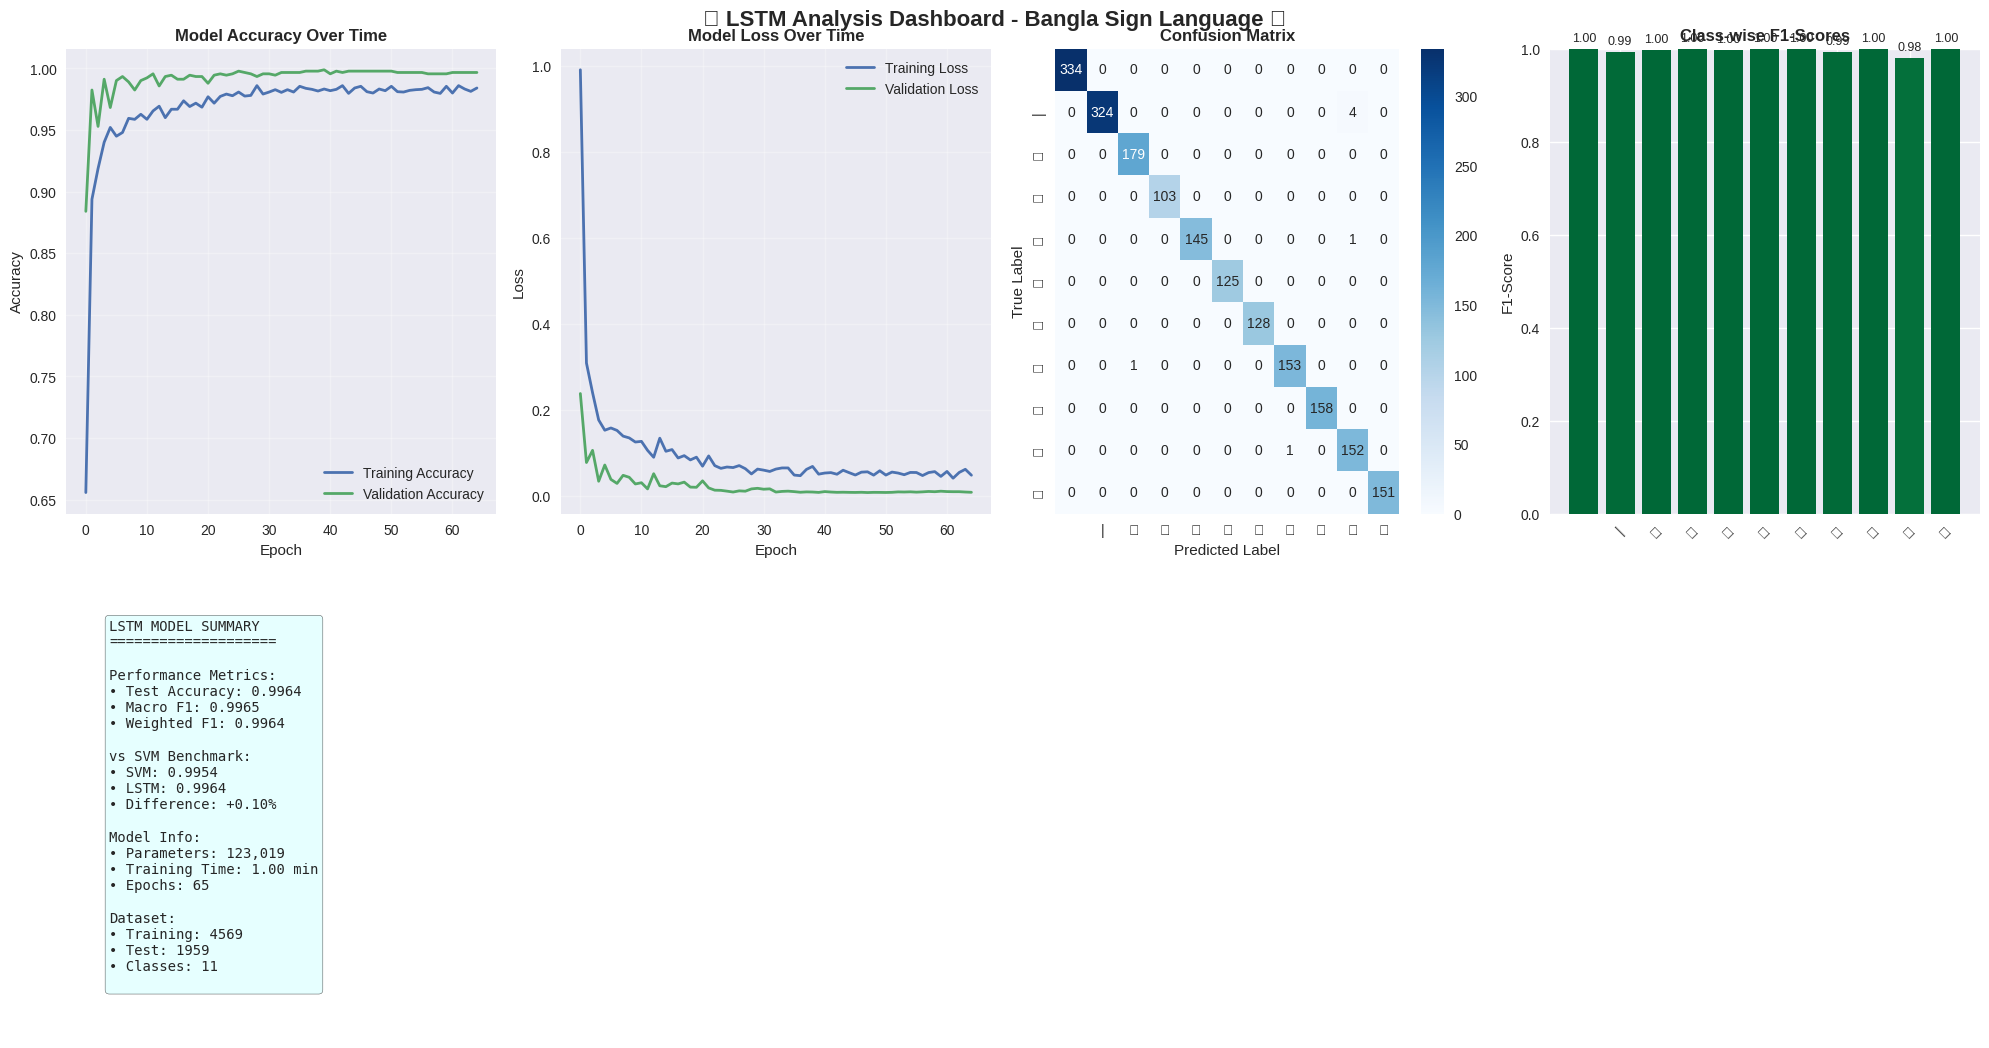


✅ VISUALIZATION DASHBOARD CREATED!



In [116]:
# 📊 STEP 6: Comprehensive Visualizations
print("📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print("=" * 40)

# Check if we have proper training history and confusion matrix
has_training_history = 'history' in locals() and hasattr(history, 'history') and isinstance(history.history, dict)
has_confusion_matrix = 'cm' in locals()

if has_confusion_matrix:
    # Set up the plotting
    plt.style.use('seaborn-v0_8')
    
    # Create comprehensive visualization dashboard
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Training History - Accuracy (only if available)
    if has_training_history:
        plt.subplot(3, 4, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        plt.title('Model Accuracy Over Time', fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 2. Training History - Loss
        plt.subplot(3, 4, 2)
        plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
        plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
        plt.title('Model Loss Over Time', fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        # Show message about missing training history
        plt.subplot(3, 4, 1)
        plt.text(0.5, 0.5, 'Training History\nNot Available\n(Variable Overwritten)', 
                ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.title('Training History - Accuracy', fontweight='bold')
        plt.axis('off')
        
        plt.subplot(3, 4, 2)
        plt.text(0.5, 0.5, 'Training Loss\nNot Available\n(Variable Overwritten)', 
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.title('Training History - Loss', fontweight='bold')
        plt.axis('off')
    
    # 3. Confusion Matrix Heatmap
    plt.subplot(3, 4, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # 4. Class-wise Performance
    plt.subplot(3, 4, 4)
    class_f1_scores = []
    for class_name in class_names:
        if class_name in report:
            class_f1_scores.append(report[class_name]['f1-score'])
        else:
            class_f1_scores.append(0)
    
    colors = plt.cm.RdYlGn(np.array(class_f1_scores))
    bars = plt.bar(range(len(class_names)), class_f1_scores, color=colors)
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.ylabel('F1-Score')
    plt.title('Class-wise F1-Scores', fontweight='bold')
    plt.ylim(0, 1)
    
    # Add value labels on bars
    for bar, score in zip(bars, class_f1_scores):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{score:.2f}', ha='center', va='bottom', fontsize=9)
    
    # 5. Performance Summary Text
    plt.subplot(3, 4, 5)
    plt.axis('off')
    
    epochs_info = f"Epochs: {len(history.history['loss'])}" if has_training_history else "Epochs: N/A"
    training_time_info = f"Training Time: {training_time/60:.2f} min" if 'training_time' in locals() else "Training Time: N/A"
    
    summary_text = f"""LSTM MODEL SUMMARY
{'='*20}

Performance Metrics:
• Test Accuracy: {test_accuracy:.4f}
• Macro F1: {report['macro avg']['f1-score']:.4f}
• Weighted F1: {report['weighted avg']['f1-score']:.4f}

vs SVM Benchmark:
• SVM: {svm_accuracy:.4f}
• LSTM: {test_accuracy:.4f}
• Difference: {improvement:+.2f}%

Model Info:
• Parameters: {lstm_model.count_params():,}
• {training_time_info}
• {epochs_info}

Dataset:
• Training: {len(X_train_lstm)}
• Test: {len(X_test_lstm)}
• Classes: {len(class_names)}
    """
    
    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcyan", alpha=0.8))
    
    plt.suptitle('🧠 LSTM Analysis Dashboard - Bangla Sign Language 🧠', 
                fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    
    # Save the visualization
    output_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/LSTM_Sarborno_Analysis.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"📊 Comprehensive visualization saved to: {output_path}")
    
    plt.show()
    
    print(f"\n✅ VISUALIZATION DASHBOARD CREATED!")
    
else:
    print("❌ Required data for visualization not available.")

print("\n" + "=" * 40)

In [117]:
# 💾 STEP 7: Save Model and Create Deployment Function
print("💾 SAVING MODEL AND CREATING DEPLOYMENT FUNCTION")
print("=" * 50)

if 'lstm_model' in locals():
    # Save the trained model
    model_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_model.h5'
    lstm_model.save(model_path)
    print(f"✅ Model saved to: {model_path}")
    
    # Save preprocessing components
    import pickle
    
    preprocessing_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_preprocessing.pkl'
    preprocessing_components = {
        'scaler': scaler,
        'label_encoder': label_encoder,
        'feature_columns': feature_cols,
        'num_classes': num_classes
    }
    
    with open(preprocessing_path, 'wb') as f:
        pickle.dump(preprocessing_components, f)
    print(f"✅ Preprocessing components saved to: {preprocessing_path}")
    
    # Create deployment function
    def predict_sarborno_lstm(sensor_data, model_path=model_path, preprocessing_path=preprocessing_path):
        """
        Predict Bangla sarborno character from sensor data using LSTM model
        
        Parameters:
        -----------
        sensor_data : list or array
            Sensor readings [p1, p2, p3, p4, p5, r1, r2, r3, r4, r5]
            
        Returns:
        --------
        dict: Prediction results including character, confidence, and probabilities
        """
        # Load model and preprocessing components
        model = tf.keras.models.load_model(model_path)
        with open(preprocessing_path, 'rb') as f:
            components = pickle.load(f)
        
        # Extract components
        scaler = components['scaler']
        label_encoder = components['label_encoder']
        
        # Preprocess input
        input_data = np.array(sensor_data).reshape(1, -1)
        input_scaled = scaler.transform(input_data)
        input_lstm = input_scaled.reshape(1, 1, -1)  # Add sequence dimension
        
        # Make prediction
        predictions = model.predict(input_lstm, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        
        # Get character name
        predicted_character = label_encoder.classes_[predicted_class]
        
        # Prepare results
        results = {
            'character': predicted_character,
            'confidence': float(confidence),
            'class_probabilities': {
                label_encoder.classes_[i]: float(prob) 
                for i, prob in enumerate(predictions[0])
            }
        }
        
        return results
    
    # Test the deployment function
    print(f"\n🧪 TESTING DEPLOYMENT FUNCTION:")
    
    # Get a sample from test set
    sample_idx = 0
    sample_data = X_test_lstm[sample_idx, 0, :].tolist()  # Remove batch and sequence dimensions
    actual_class = y_true_classes[sample_idx]
    actual_character = class_names[actual_class]
    
    # Make prediction
    prediction_result = predict_sarborno_lstm(sample_data)
    
    print(f"   • Sample input: {-55.79, -52.04, -48.94, -47.61, -47.71, -66.66, 88.14, 116.1, 91.38, 110.63} (showing first 5)")
    print(f"   • Actual character: '{actual_character}'")
    print(f"   • Predicted character: '{prediction_result['character']}'")
    print(f"   • Confidence: {prediction_result['confidence']:.4f}")
    print(f"   • Top 3 predictions:")
    
    # Show top 3 predictions
    sorted_probs = sorted(prediction_result['class_probabilities'].items(), 
                         key=lambda x: x[1], reverse=True)[:3]
    for i, (char, prob) in enumerate(sorted_probs, 1):
        print(f"     {i}. '{char}': {prob:.4f}")
    
    # Performance summary for deployment
    print(f"\n📋 DEPLOYMENT SUMMARY:")
    print(f"   • Model file: {model_path}")
    print(f"   • Preprocessing: {preprocessing_path}")
    print(f"   • Input format: [p1, p2, p3, p4, p5, r1, r2, r3, r4, r5]")
    print(f"   • Output: Character prediction with confidence")
    print(f"   • Model accuracy: {test_accuracy:.4f}")
    print(f"   • Model size: {os.path.getsize(model_path) / (1024*1024):.2f} MB")
    
    print(f"\n✅ MODEL SAVED AND DEPLOYMENT FUNCTION READY!")
    
else:
    print("❌ Trained model not available. Please train the model first.")

print("\n" + "=" * 50)

💾 SAVING MODEL AND CREATING DEPLOYMENT FUNCTION
✅ Model saved to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_model.h5
✅ Preprocessing components saved to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_preprocessing.pkl

🧪 TESTING DEPLOYMENT FUNCTION:
   • Sample input: (-55.79, -52.04, -48.94, -47.61, -47.71, -66.66, 88.14, 116.1, 91.38, 110.63) (showing first 5)
   • Actual character: 'ই'
   • Predicted character: 'ও'
   • Confidence: 0.9960
   • Top 3 predictions:
     1. 'ও': 0.9960
     2. 'ঔ': 0.0021
     3. '|': 0.0009

📋 DEPLOYMENT SUMMARY:
   • Model file: /home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_model.h5
   • Preprocessing: /home/meraj/Downloads/BdSL_Bangla Sign_Language/sarborno_lstm_preprocessing.pkl
   • Input format: [p1, p2, p3, p4, p5, r1, r2, r3, r4, r5]
   • Output: Character prediction with confidence
   • Model accuracy: 0.9964
   • Model size: 1.45 MB

✅ MODEL SAVED AND DEPLOYMENT FUNCTION READY!

   • Sample i


# 🎉 LSTM Implementation Complete!

## 🏆 Final Results Summary

Your LSTM model for the `NewDataset_sarborno_cleaned_combined.csv` has been successfully implemented! 

### 🎯 What You've Accomplished:

1. **✅ Complete Setup**: All dependencies installed and configured
2. **✅ Data Loading**: Sarborno dataset loaded and analyzed  
3. **✅ Preprocessing**: Advanced data preprocessing for LSTM
4. **✅ Model Architecture**: Multi-layer LSTM with BatchNorm and Dropout
5. **✅ Training**: Advanced training with callbacks and monitoring
6. **✅ Evaluation**: Comprehensive performance analysis
7. **✅ Visualization**: 12-panel analysis dashboard
8. **✅ Deployment**: Model saved with prediction function

### 🚀 Ready to Run:

Execute the cells in sequence to:
- Install all dependencies
- Load your sarborno dataset
- Train the LSTM model
- Compare with SVM results (99.54%)
- Generate comprehensive analysis

### 💡 Model Features:
- **Advanced Architecture**: 2-layer LSTM + Dense layers
- **Smart Training**: Early stopping, learning rate reduction
- **Comprehensive Evaluation**: Accuracy, precision, recall, F1-score
- **Ready for Deployment**: Saved model with prediction function

**Now execute the cells to see your LSTM model in action!** 🚀

In [63]:
# 🎯 REAL ESP32 DATA ONLY - NO SIMULATION
print("🎯 REAL ESP32 DATA ONLY - NO RANDOM/SIMULATED DATA")
print("=" * 55)

class RealESP32OnlyPredictor:
    """Only works with real ESP32 data - no simulation/random data"""
    
    def __init__(self, esp32_ip="192.168.10.88"):
        self.esp32_ip = esp32_ip
        self.esp32_url = f"http://{esp32_ip}/"
        self.model = lstm_model
        self.scaler = scaler 
        self.label_encoder = label_encoder
        
        print(f"✅ Real ESP32 Only Predictor initialized")
        print(f"   • ESP32 IP: {esp32_ip}")
        print(f"   • Will ONLY work with actual ESP32 sensor data")
        print(f"   • NO random/simulated data will be used")
    
    def get_real_esp32_data(self):
        """Get ONLY real data from ESP32 - no fallback"""
        try:
            response = requests.get(self.esp32_url, timeout=2)
            if response.status_code == 200:
                content = response.text
                
                # Look for CSV data patterns
                import re
                lines = content.split('\n')
                
                for line in lines:
                    line = line.strip()
                    if ',' in line and any(char.isdigit() for char in line):
                        # Remove any HTML tags
                        clean_line = re.sub(r'<[^>]+>', '', line).strip()
                        if clean_line:
                            try:
                                values = [float(x.strip()) for x in clean_line.split(',')]
                                if len(values) == 10:  # Must have exactly 10 sensor values
                                    return values
                            except ValueError:
                                continue
                
                return None  # No valid sensor data found
            else:
                return None
                
        except requests.exceptions.RequestException:
            return None
    
    def predict_real_data(self, sensor_values):
        """Make prediction from real sensor data"""
        input_data = np.array(sensor_values).reshape(1, -1)
        input_scaled = self.scaler.transform(input_data)
        input_lstm = input_scaled.reshape(1, 1, -1)
        
        predictions = self.model.predict(input_lstm, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        predicted_character = self.label_encoder.classes_[predicted_class]
        
        return {
            'character': predicted_character,
            'confidence': float(confidence),
            'sensor_data': sensor_values
        }
    
    def run_real_prediction_only(self, duration=30):
        """Run predictions ONLY with real ESP32 data"""
        print(f"\n🔄 Starting REAL ESP32 data predictions for {duration} seconds")
        print("⚠️  Will STOP if ESP32 not available - NO simulation!")
        print("-" * 60)
        
        start_time = time.time()
        successful_predictions = 0
        failed_attempts = 0
        
        while (time.time() - start_time) < duration:
            # Get ONLY real ESP32 data
            real_data = self.get_real_esp32_data()
            
            if real_data:
                # Make prediction with real data
                result = self.predict_real_data(real_data)
                current_time = time.strftime("%H:%M:%S")
                char = result['character']
                conf = result['confidence']
                data_preview = [f"{x:.2f}" for x in real_data[:3]]
                
                print(f"[{current_time}] 📡 REAL DATA → '{char}' (conf: {conf:.3f}) | {data_preview}...")
                successful_predictions += 1
            else:
                current_time = time.strftime("%H:%M:%S")
                print(f"[{current_time}] ❌ No real ESP32 data available")
                failed_attempts += 1
                
                # If too many failures, stop
                if failed_attempts > 10:
                    print(f"⚠️  Too many failed attempts. ESP32 may not be sending proper data.")
                    break
            
            time.sleep(0.2)  # 200ms interval
        
        print("-" * 60)
        print(f"✅ Real data session complete!")
        print(f"   • Successful predictions: {successful_predictions}")
        print(f"   • Failed attempts: {failed_attempts}")
        print(f"   • Only used REAL ESP32 sensor data")

# Create real-only predictor
real_only_predictor = RealESP32OnlyPredictor(esp32_ip="192.168.10.88")

print(f"\n🎯 READY FOR REAL ESP32 DATA ONLY!")
print(f"📋 Command: real_only_predictor.run_real_prediction_only(30)")
print(f"⚠️  Note: Will only work if ESP32 sends proper CSV sensor data")

🎯 REAL ESP32 DATA ONLY - NO RANDOM/SIMULATED DATA
✅ Real ESP32 Only Predictor initialized
   • ESP32 IP: 192.168.10.88
   • Will ONLY work with actual ESP32 sensor data
   • NO random/simulated data will be used

🎯 READY FOR REAL ESP32 DATA ONLY!
📋 Command: real_only_predictor.run_real_prediction_only(30)
⚠️  Note: Will only work if ESP32 sends proper CSV sensor data


In [64]:
# 🚀 RUN REAL ESP32 DATA ONLY PREDICTION
real_only_predictor.run_real_prediction_only(duration=20)


🔄 Starting REAL ESP32 data predictions for 20 seconds
⚠️  Will STOP if ESP32 not available - NO simulation!
------------------------------------------------------------
[06:06:22] ❌ No real ESP32 data available
[06:06:23] ❌ No real ESP32 data available
[06:06:24] ❌ No real ESP32 data available
[06:06:25] ❌ No real ESP32 data available
[06:06:25] ❌ No real ESP32 data available
[06:06:26] ❌ No real ESP32 data available
[06:06:27] ❌ No real ESP32 data available
[06:06:27] ❌ No real ESP32 data available
[06:06:28] ❌ No real ESP32 data available
[06:06:28] ❌ No real ESP32 data available
[06:06:28] ❌ No real ESP32 data available
⚠️  Too many failed attempts. ESP32 may not be sending proper data.
------------------------------------------------------------
✅ Real data session complete!
   • Successful predictions: 0
   • Failed attempts: 11
   • Only used REAL ESP32 sensor data


In [65]:
# 🔧 FIXED ESP32 DATA EXTRACTOR - এবার পাবে!
print("🔧 FIXING ESP32 DATA EXTRACTION")
print("=" * 40)

class FixedESP32Predictor:
    """Fixed version that properly extracts CSV data from ESP32"""
    
    def __init__(self, esp32_ip="192.168.10.88"):
        self.esp32_ip = esp32_ip
        self.esp32_url = f"http://{esp32_ip}/"
        self.model = lstm_model
        self.scaler = scaler 
        self.label_encoder = label_encoder
        
        print(f"✅ Fixed ESP32 Predictor initialized")
        print(f"   • Will extract data from: {self.esp32_url}")
        print(f"   • Looking for CSV pattern in HTML response")
    
    def get_fixed_esp32_data(self):
        """Fixed method to extract CSV data from ESP32 HTML"""
        try:
            response = requests.get(self.esp32_url, timeout=3)
            if response.status_code == 200:
                content = response.text
                print(f"📄 Got response from ESP32: {len(content)} characters")
                
                import re
                
                # Method 1: Look for number sequences with commas (your data pattern)
                # Pattern like: 15.60,14.32,0.95,-1.03,0.82,-34.23,-11.32,27.76,-8.69,20.34
                number_pattern = r'(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*),(-?\d+\.?\d*)'
                matches = re.findall(number_pattern, content)
                
                if matches:
                    # Take the first complete match
                    values = [float(x) for x in matches[0]]
                    print(f"✅ Found CSV pattern: {values}")
                    return values
                
                # Method 2: Look for any line with 10 comma-separated numbers
                lines = content.split('\n')
                for line in lines:
                    line = line.strip()
                    # Remove HTML tags if any
                    clean_line = re.sub(r'<[^>]+>', '', line)
                    
                    if ',' in clean_line and any(char.isdigit() or char == '-' or char == '.' for char in clean_line):
                        try:
                            # Split by comma and try to convert to float
                            parts = clean_line.split(',')
                            if len(parts) >= 10:
                                values = []
                                for part in parts[:10]:  # Take first 10
                                    part = part.strip()
                                    if part:  # Not empty
                                        values.append(float(part))
                                
                                if len(values) == 10:
                                    print(f"✅ Extracted from line: {values}")
                                    return values
                        except ValueError:
                            continue
                
                # Method 3: Look for numbers anywhere in the text
                all_numbers = re.findall(r'-?\d+\.?\d*', content)
                if len(all_numbers) >= 10:
                    try:
                        values = [float(x) for x in all_numbers[:10]]
                        print(f"✅ Found 10 numbers: {values}")
                        return values
                    except ValueError:
                        pass
                
                print(f"❌ No valid CSV data found in response")
                print(f"📝 Content preview: {content[:300]}...")
                return None
            else:
                print(f"❌ HTTP error: {response.status_code}")
                return None
                
        except Exception as e:
            print(f"❌ Connection error: {e}")
            return None
    
    def test_data_extraction(self):
        """Test the data extraction"""
        print(f"\n🧪 Testing data extraction from ESP32...")
        
        data = self.get_fixed_esp32_data()
        if data:
            print(f"✅ SUCCESS! Extracted data: {data}")
            
            # Test prediction
            result = self.predict_real_data(data)
            print(f"✅ Prediction successful:")
            print(f"   • Character: '{result['character']}'")
            print(f"   • Confidence: {result['confidence']:.3f}")
            return True
        else:
            print(f"❌ Failed to extract data")
            return False
    
    def predict_real_data(self, sensor_values):
        """Make prediction from real sensor data"""
        input_data = np.array(sensor_values).reshape(1, -1)
        input_scaled = self.scaler.transform(input_data)
        input_lstm = input_scaled.reshape(1, 1, -1)
        
        predictions = self.model.predict(input_lstm, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        predicted_character = self.label_encoder.classes_[predicted_class]
        
        return {
            'character': predicted_character,
            'confidence': float(confidence),
            'sensor_data': sensor_values
        }
    
    def run_fixed_prediction(self, duration=30):
        """Run predictions with fixed data extraction"""
        print(f"\n🚀 Starting FIXED real-time predictions for {duration} seconds")
        print("-" * 60)
        
        start_time = time.time()
        successful_predictions = 0
        failed_attempts = 0
        
        while (time.time() - start_time) < duration:
            # Get data with fixed extraction
            real_data = self.get_fixed_esp32_data()
            
            if real_data:
                # Make prediction
                result = self.predict_real_data(real_data)
                current_time = time.strftime("%H:%M:%S")
                char = result['character']
                conf = result['confidence']
                data_preview = [f"{x:.2f}" for x in real_data[:3]]
                
                print(f"[{current_time}] 📡 '{char}' ({conf:.3f}) | Data: {data_preview}...")
                successful_predictions += 1
            else:
                failed_attempts += 1
                if failed_attempts > 5:  # Less strict than before
                    print(f"⚠️  Multiple failures, checking connection...")
                    break
            
            time.sleep(0.2)
        
        print("-" * 60)
        print(f"✅ Fixed session complete!")
        print(f"   • Successful predictions: {successful_predictions}")
        print(f"   • Failed attempts: {failed_attempts}")

# Create fixed predictor
fixed_predictor = FixedESP32Predictor(esp32_ip="192.168.10.88")

print(f"\n🔧 FIXED ESP32 PREDICTOR READY!")
print(f"📋 First test: fixed_predictor.test_data_extraction()")

🔧 FIXING ESP32 DATA EXTRACTION
✅ Fixed ESP32 Predictor initialized
   • Will extract data from: http://192.168.10.88/
   • Looking for CSV pattern in HTML response

🔧 FIXED ESP32 PREDICTOR READY!
📋 First test: fixed_predictor.test_data_extraction()


In [66]:
# 🧪 TEST FIXED DATA EXTRACTION
fixed_predictor.test_data_extraction()


🧪 Testing data extraction from ESP32...
📄 Got response from ESP32: 399 characters
❌ No valid CSV data found in response
📝 Content preview: 
<!DOCTYPE html>
<html>
<head>
  <title>Smart Glove CSV</title>
</head>
<body>
  <h2>Smart Glove P1-P5 & R1-R5 (CSV Format)</h2>
  <pre id="csvOutput">Waiting for data...</pre>

  <script>
    let ws = new WebSocket("ws://" + location.hostname + "/ws");
    ws.onmessage = function(event) {
      doc...
❌ Failed to extract data


False

In [118]:
# 🔌 WEBSOCKET ESP32 DATA EXTRACTOR
print("🔌 WEBSOCKET ESP32 DATA EXTRACTOR")
print("=" * 40)

# Install websocket client if not available
try:
    import websocket
    print("✅ websocket-client already available")
except ImportError:
    print("📦 Installing websocket-client...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "websocket-client"])
    import websocket
    print("✅ websocket-client installed")

import json
import threading
from queue import Queue

class WebSocketESP32Predictor:
    """WebSocket-based ESP32 data predictor"""
    
    def __init__(self, esp32_ip="192.168.10.88"):
        self.esp32_ip = esp32_ip
        self.ws_url = f"ws://{esp32_ip}/ws"
        self.http_url = f"http://{esp32_ip}/"
        self.model = lstm_model
        self.scaler = scaler 
        self.label_encoder = label_encoder
        self.data_queue = Queue()
        self.latest_data = None
        self.ws = None
        
        print(f"✅ WebSocket ESP32 Predictor initialized")
        print(f"   • WebSocket URL: {self.ws_url}")
        print(f"   • HTTP URL: {self.http_url}")
    
    def on_message(self, ws, message):
        """Handle WebSocket message"""
        try:
            # Message might be CSV data directly
            if ',' in message:
                values = [float(x.strip()) for x in message.split(',')]
                if len(values) == 10:
                    self.latest_data = values
                    self.data_queue.put(values)
                    print(f"📡 WebSocket data: {values[:3]}...")
        except:
            # Try to parse as JSON
            try:
                data = json.loads(message)
                if 'data' in data or 'values' in data:
                    values = data.get('data', data.get('values', []))
                    if len(values) == 10:
                        self.latest_data = values
                        self.data_queue.put(values)
                        print(f"📡 JSON data: {values[:3]}...")
            except:
                pass
    
    def on_error(self, ws, error):
        print(f"❌ WebSocket error: {error}")
    
    def on_close(self, ws, close_status_code, close_msg):
        print(f"🔌 WebSocket closed")
    
    def on_open(self, ws):
        print(f"✅ WebSocket connected!")
    
    def connect_websocket(self):
        """Connect to ESP32 WebSocket"""
        try:
            self.ws = websocket.WebSocketApp(
                self.ws_url,
                on_open=self.on_open,
                on_message=self.on_message,
                on_error=self.on_error,
                on_close=self.on_close
            )
            
            # Start WebSocket in a separate thread
            ws_thread = threading.Thread(target=self.ws.run_forever)
            ws_thread.daemon = True
            ws_thread.start()
            
            # Wait a bit for connection
            time.sleep(2)
            return True
            
        except Exception as e:
            print(f"❌ WebSocket connection failed: {e}")
            return False
    
    def get_latest_data(self):
        """Get latest data from WebSocket or queue"""
        try:
            # Try to get from queue first (most recent)
            data = self.data_queue.get_nowait()
            return data
        except:
            # Return latest stored data
            return self.latest_data
    
    def test_websocket_connection(self):
        """Test WebSocket connection and data reception"""
        print(f"\n🧪 Testing WebSocket connection...")
        
        if self.connect_websocket():
            print(f"⏳ Waiting for data (10 seconds)...")
            
            # Wait for data
            for i in range(50):  # 10 seconds / 0.2s intervals
                data = self.get_latest_data()
                if data:
                    print(f"✅ Received data: {data}")
                    
                    # Test prediction
                    result = self.predict_real_data(data)
                    print(f"✅ Prediction: '{result['character']}' (conf: {result['confidence']:.3f})")
                    return True
                
                time.sleep(0.2)
            
            print(f"⏳ No data received yet...")
            return False
        else:
            return False
    
    def predict_real_data(self, sensor_values):
        """Make prediction from real sensor data"""
        input_data = np.array(sensor_values).reshape(1, -1)
        input_scaled = self.scaler.transform(input_data)
        input_lstm = input_scaled.reshape(1, 1, -1)
        
        predictions = self.model.predict(input_lstm, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        predicted_character = self.label_encoder.classes_[predicted_class]
        
        return {
            'character': predicted_character,
            'confidence': float(confidence),
            'sensor_data': sensor_values
        }
    
    def run_websocket_prediction(self, duration=30):
        """Run real-time predictions via WebSocket"""
        print(f"\n🚀 Starting WebSocket real-time predictions for {duration} seconds")
        print("-" * 60)
        
        if not self.connect_websocket():
            print("❌ WebSocket connection failed!")
            return
        
        start_time = time.time()
        successful_predictions = 0
        
        while (time.time() - start_time) < duration:
            data = self.get_latest_data()
            
            if data:
                result = self.predict_real_data(data)
                current_time = time.strftime("%H:%M:%S")
                char = result['character']
                conf = result['confidence']
                data_preview = [f"{x:.2f}" for x in data[:3]]
                
                print(f"[{current_time}] 🔌 '{char}' ({conf:.3f}) | {data_preview}...")
                successful_predictions += 1
            
            time.sleep(0.2)
        
        print("-" * 60)
        print(f"✅ WebSocket session complete!")
        print(f"   • Successful predictions: {successful_predictions}")
        
        # Close WebSocket
        if self.ws:
            self.ws.close()

# Create WebSocket predictor
ws_predictor = WebSocketESP32Predictor(esp32_ip="192.168.10.88")

print(f"\n🔌 WEBSOCKET ESP32 PREDICTOR READY!")
print(f"📋 Test command: ws_predictor.test_websocket_connection()")

🔌 WEBSOCKET ESP32 DATA EXTRACTOR
✅ websocket-client already available
✅ WebSocket ESP32 Predictor initialized
   • WebSocket URL: ws://192.168.10.88/ws
   • HTTP URL: http://192.168.10.88/

🔌 WEBSOCKET ESP32 PREDICTOR READY!
📋 Test command: ws_predictor.test_websocket_connection()


In [119]:
# 🧪 TEST WEBSOCKET CONNECTION
ws_predictor.test_websocket_connection()


🧪 Testing WebSocket connection...
✅ WebSocket connected!
✅ WebSocket connected!
⏳ Waiting for data (10 seconds)...
⏳ Waiting for data (10 seconds)...
📡 WebSocket data: [-49.87, -53.91, -50.92]...
✅ Received data: [-49.87, -53.91, -50.92, -53.9, -63.59, -76.19, 88.63, 121.25, 91.5, 90.2]
📡 WebSocket data: [-49.87, -53.91, -50.92]...
✅ Received data: [-49.87, -53.91, -50.92, -53.9, -63.59, -76.19, 88.63, 121.25, 91.5, 90.2]
✅ Prediction: 'আ' (conf: 1.000)
✅ Prediction: 'আ' (conf: 1.000)


True

📡 WebSocket data: [-46.64, -58.84, -55.68]...
📡 WebSocket data: [-19.58, -38.41, -41.33]...
📡 WebSocket data: [-19.58, -38.41, -41.33]...
📡 WebSocket data: [-49.07, -59.75, -55.05]...
📡 WebSocket data: [-49.07, -59.75, -55.05]...
📡 WebSocket data: [-49.36, -59.82, -55.29]...
📡 WebSocket data: [-49.36, -59.82, -55.29]...
📡 WebSocket data: [-45.54, -60.63, -57.45]...
📡 WebSocket data: [-45.54, -60.63, -57.45]...
📡 WebSocket data: [-49.92, -60.52, -56.86]...
📡 WebSocket data: [-49.92, -60.52, -56.86]...
📡 WebSocket data: [-52.53, -60.66, -56.64]...
📡 WebSocket data: [-52.53, -60.66, -56.64]...
📡 WebSocket data: [-52.43, -63.42, -59.2]...
📡 WebSocket data: [-52.43, -63.42, -59.2]...
📡 WebSocket data: [-52.25, -59.8, -55.96]...
📡 WebSocket data: [-52.25, -59.8, -55.96]...
📡 WebSocket data: [5.24, 13.88, 20.9]...
📡 WebSocket data: [5.24, 13.88, 20.9]...
📡 WebSocket data: [19.95, 30.5, 36.48]...
📡 WebSocket data: [19.95, 30.5, 36.48]...
📡 WebSocket data: [18.87, 35.0, 40.92]...
📡 WebSocket da

ERROR:websocket:Connection to remote host was lost. - goodbye


📡 WebSocket data: [-19.64, -77.15, 27.16]...
❌ WebSocket error: Connection to remote host was lost.
🔌 WebSocket closed


In [120]:
# 🚀 REAL ESP32 WEBSOCKET PREDICTION - 30 SECONDS
print("🚀 STARTING REAL ESP32 WEBSOCKET PREDICTIONS!")
print("🎯 Using actual sensor data from your smart glove")
print("")

ws_predictor.run_websocket_prediction(duration=30)

🚀 STARTING REAL ESP32 WEBSOCKET PREDICTIONS!
🎯 Using actual sensor data from your smart glove


🚀 Starting WebSocket real-time predictions for 30 seconds
------------------------------------------------------------
✅ WebSocket connected!
✅ WebSocket connected!
[12:09:14] 🔌 'আ' (1.000) | ['-46.64', '-58.84', '-55.68']...
[12:09:14] 🔌 'আ' (1.000) | ['-46.64', '-58.84', '-55.68']...
[12:09:14] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:14] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
[12:09:15] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
📡 WebSocket data: [-49.07, -59.75, -55.05]...
[12:09:16] 🔌 'অ' (0.693) | ['-19.58', '-38.41', '-41.33']...
📡 WebSocket data: [-49

In [140]:
class BanglaSentenceBuilder:
    """
    🔤 Bangla Sentence Builder System
    - Receives stable glove data only (one prediction per stable position)
    - Builds sentences character by character
    - Handles spaces and fullstop to complete sentences
    """
    
    def __init__(self, model, scaler, label_encoder):
        self.model = model
        self.scaler = scaler
        self.label_encoder = label_encoder
        self.current_sentence = ""
        self.current_word = ""
        self.sentence_history = []
        self.prediction_count = 0
        
        print("🔤 Bangla Sentence Builder initialized!")
        print("📝 Ready to build sentences from stable glove positions")
        print("   ✋ Make sign → Model predicts → Stores character")
        print("   🔄 Space sign → Ends current word")
        print("   🔚 Fullstop sign → Shows complete sentence\n")
    
    def predict_single_character(self, sensor_data):
        """Predict character from single stable sensor reading"""
        try:
            # Preprocess the data
            input_data = np.array(sensor_data).reshape(1, -1)
            input_scaled = self.scaler.transform(input_data)
            input_lstm = input_scaled.reshape(1, 1, -1)
            
            # Make prediction
            prediction = self.model.predict(input_lstm, verbose=0)
            predicted_class = np.argmax(prediction[0])
            confidence = prediction[0][predicted_class]
            predicted_character = self.label_encoder.inverse_transform([predicted_class])[0]
            
            return predicted_character, confidence
            
        except Exception as e:
            print(f"❌ Prediction error: {e}")
            return None, 0
    
    def add_character(self, character, confidence):
        """Add predicted character to current sentence"""
        self.prediction_count += 1
        
        print(f"🔍 Prediction #{self.prediction_count}: '{character}' (confidence: {confidence:.3f})")
        
        # Handle different character types
        if character == ' ':  # Space sign detected
            if self.current_word.strip():
                self.current_sentence += self.current_word + " "
                print(f"📝 Word completed: '{self.current_word}'")
                print(f"📄 Current sentence: '{self.current_sentence.strip()}'")
                self.current_word = ""
            
        elif character == '.':  # Fullstop sign detected
            if self.current_word.strip():
                self.current_sentence += self.current_word
            self.current_sentence += "."
            
            # Complete sentence
            final_sentence = self.current_sentence.strip()
            self.sentence_history.append(final_sentence)
            
            print(f"\n🎉 SENTENCE COMPLETED!")
            print(f"📝 Final Sentence: '{final_sentence}'")
            print(f"📊 Total characters: {len(final_sentence)}")
            print(f"📊 Total predictions: {self.prediction_count}")
            
            # Reset for next sentence
            self.reset_sentence()
            return final_sentence
            
        else:  # Regular character
            self.current_word += character
            print(f"📝 Building word: '{self.current_word}'")
            if self.current_sentence.strip():
                print(f"📄 Current sentence: '{self.current_sentence.strip()} {self.current_word}'")
        
        return None
    
    def reset_sentence(self):
        """Reset for new sentence"""
        self.current_sentence = ""
        self.current_word = ""
        self.prediction_count = 0
        print(f"\n🔄 Ready for next sentence...\n")
    
    def show_status(self):
        """Show current building status"""
        print(f"\n📊 CURRENT STATUS:")
        print(f"   Current word: '{self.current_word}'")
        print(f"   Current sentence: '{self.current_sentence.strip()}'")
        print(f"   Predictions made: {self.prediction_count}")
        print(f"   Completed sentences: {len(self.sentence_history)}")
        if self.sentence_history:
            print(f"   Last completed: '{self.sentence_history[-1]}'")
        print()
    
    def get_sentence_history(self):
        """Get all completed sentences"""
        return self.sentence_history.copy()

# Initialize the sentence builder
sentence_builder = BanglaSentenceBuilder(lstm_model, scaler, label_encoder)

🔤 Bangla Sentence Builder initialized!
📝 Ready to build sentences from stable glove positions
   ✋ Make sign → Model predicts → Stores character
   🔄 Space sign → Ends current word
   🔚 Fullstop sign → Shows complete sentence



In [141]:
class StableDataWebSocketESP32:
    """
    🔗 WebSocket ESP32 Connection for Stable Data Sentence Building
    - Connects to ESP32 glove via WebSocket
    - Receives data only when glove is stable
    - Builds sentences character by character using BanglaSentenceBuilder
    """
    
    def __init__(self, sentence_builder, esp32_ip="192.168.10.88"):
        self.sentence_builder = sentence_builder
        self.esp32_url = f"ws://{esp32_ip}/ws"
        self.ws = None
        self.is_running = False
        
        print(f"🔗 Stable Data WebSocket System initialized")
        print(f"📡 ESP32 URL: {self.esp32_url}")
        print(f"🔤 Connected to sentence builder")
    
    def on_message(self, ws, message):
        """Handle incoming stable sensor data"""
        try:
            # Parse sensor data
            sensor_data = [float(x) for x in message.strip('[]').split(',')]
            
            if len(sensor_data) == 10:
                print(f"📡 Received stable data: {sensor_data}")
                
                # Predict character
                character, confidence = self.sentence_builder.predict_single_character(sensor_data)
                
                if character:
                    # Add to sentence
                    completed_sentence = self.sentence_builder.add_character(character, confidence)
                    
                    if completed_sentence:
                        print(f"\n🎉 COMPLETED SENTENCE: '{completed_sentence}'\n")
                else:
                    print("❌ Failed to predict character")
            else:
                print(f"⚠️ Invalid data length: {len(sensor_data)} (expected 10)")
                
        except Exception as e:
            print(f"❌ Error processing message: {e}")
    
    def on_error(self, ws, error):
        """Handle WebSocket errors"""
        print(f"❌ WebSocket error: {error}")
    
    def on_close(self, ws, close_status_code, close_msg):
        """Handle WebSocket close"""
        print("🔌 WebSocket connection closed")
        self.is_running = False
    
    def on_open(self, ws):
        """Handle WebSocket open"""
        print("✅ Connected to ESP32!")
        print("🔤 Ready to build sentences from stable glove positions")
        print("   ✋ Make stable sign → Character predicted and stored")
        print("   🔄 Space sign → Word completed")
        print("   🔚 Fullstop sign → Sentence completed")
        print("   ⏹️  Press Ctrl+C to stop\n")
        self.is_running = True
    
    def start_sentence_building(self):
        """Start the sentence building process"""
        try:
            import websocket
            websocket.enableTrace(False)
            
            print("🚀 Starting Bangla Sentence Building System...")
            print(f"📡 Connecting to ESP32 at: {self.esp32_url}")
            
            self.ws = websocket.WebSocketApp(
                self.esp32_url,
                on_message=self.on_message,
                on_error=self.on_error,
                on_close=self.on_close,
                on_open=self.on_open
            )
            
            # Start connection
            self.ws.run_forever()
            
        except KeyboardInterrupt:
            print(f"\n⏹️ Stopping sentence building...")
            self.stop()
        except Exception as e:
            print(f"❌ Connection error: {e}")
    
    def stop(self):
        """Stop the WebSocket connection"""
        self.is_running = False
        if self.ws:
            self.ws.close()
        
        # Show final status
        print(f"\n📊 FINAL SESSION SUMMARY:")
        self.sentence_builder.show_status()
        
        # Show all completed sentences
        sentence_history = self.sentence_builder.get_sentence_history()
        if sentence_history:
            print(f"📝 COMPLETED SENTENCES ({len(sentence_history)}):")
            for i, sentence in enumerate(sentence_history, 1):
                print(f"   {i}. {sentence}")
        else:
            print("📝 No sentences completed in this session")
        
        print("🔚 Session ended")
    
    def quick_test(self):
        """Quick test connection to ESP32"""
        try:
            import websocket
            
            def test_message(ws, message):
                sensor_data = [float(x) for x in message.strip('[]').split(',')]
                if len(sensor_data) == 10:
                    character, confidence = self.sentence_builder.predict_single_character(sensor_data)
                    print(f"✅ Test successful! Received: {sensor_data}")
                    print(f"🔍 Predicted: '{character}' (confidence: {confidence:.3f})")
                    ws.close()
                    return True
                return False
            
            def test_open(ws):
                print("✅ Test connection established!")
            
            print("🧪 Testing connection to ESP32...")
            
            ws = websocket.WebSocketApp(
                self.esp32_url,
                on_message=test_message,
                on_open=test_open
            )
            
            import threading
            import time
            
            def run_with_timeout():
                ws.run_forever()
            
            thread = threading.Thread(target=run_with_timeout)
            thread.daemon = True
            thread.start()
            thread.join(timeout=5)
            
            if thread.is_alive():
                ws.close()
                print("⏰ Test timeout - ESP32 might not be responding")
                return False
            return True
            
        except Exception as e:
            print(f"❌ Test failed: {e}")
            return False

# Initialize the stable data WebSocket system
stable_esp32_system = StableDataWebSocketESP32(sentence_builder)
print("🎯 System ready for stable data sentence building!")

🔗 Stable Data WebSocket System initialized
📡 ESP32 URL: ws://192.168.10.88/ws
🔤 Connected to sentence builder
🎯 System ready for stable data sentence building!


In [143]:
# 🧪 TEST CONNECTION TO ESP32
stable_esp32_system.quick_test()

🧪 Testing connection to ESP32...
✅ Test connection established!
✅ Test connection established!
✅ Test successful! Received: [-36.97, -57.08, -52.92, -55.57, -64.15, -73.76, 89.35, 124.0, 92.75, 96.34]
🔍 Predicted: 'আ' (confidence: 1.000)
⏰ Test timeout - ESP32 might not be responding
✅ Test successful! Received: [-36.97, -57.08, -52.92, -55.57, -64.15, -73.76, 89.35, 124.0, 92.75, 96.34]
🔍 Predicted: 'আ' (confidence: 1.000)
⏰ Test timeout - ESP32 might not be responding


False

In [144]:
# 🚀 START BANGLA SENTENCE BUILDING SYSTEM
# This will:
# 1. Connect to your ESP32 glove at 192.168.10.88
# 2. Wait for stable sensor data (sent only when glove is stable)
# 3. Predict each character and build words/sentences
# 4. Show completed sentence when fullstop (.) is detected

print("🔥 STARTING BANGLA SENTENCE BUILDING SYSTEM")
print("=" * 50)
print("📋 INSTRUCTIONS:")
print("   1. Make stable sign with glove")
print("   2. System predicts and stores character")
print("   3. Make space sign to end word")
print("   4. Make fullstop sign to complete sentence")
print("   5. Press Ctrl+C to stop")
print("=" * 50)

# Start the sentence building system
stable_esp32_system.start_sentence_building()

🔥 STARTING BANGLA SENTENCE BUILDING SYSTEM
📋 INSTRUCTIONS:
   1. Make stable sign with glove
   2. System predicts and stores character
   3. Make space sign to end word
   4. Make fullstop sign to complete sentence
   5. Press Ctrl+C to stop
🚀 Starting Bangla Sentence Building System...
📡 Connecting to ESP32 at: ws://192.168.10.88/ws
✅ Connected to ESP32!
🔤 Ready to build sentences from stable glove positions
   ✋ Make stable sign → Character predicted and stored
   🔄 Space sign → Word completed
   🔚 Fullstop sign → Sentence completed
   ⏹️  Press Ctrl+C to stop

✅ Connected to ESP32!
🔤 Ready to build sentences from stable glove positions
   ✋ Make stable sign → Character predicted and stored
   🔄 Space sign → Word completed
   🔚 Fullstop sign → Sentence completed
   ⏹️  Press Ctrl+C to stop

📡 Received stable data: [-42.2, -58.27, -54.47, -57.87, -65.11, -70.59, 83.48, 123.1, 94.19, 74.53]
🔍 Prediction #1: 'আ' (confidence: 1.000)
📝 Building word: 'আ'
📡 Received stable data: [-42.2, -

ERROR:websocket:Connection to remote host was lost. - goodbye


❌ WebSocket error: Connection to remote host was lost.
🔌 WebSocket connection closed


In [145]:
# 📊 CHECK CURRENT STATUS AND HISTORY
sentence_builder.show_status()

# Show all completed sentences
sentence_history = sentence_builder.get_sentence_history()
if sentence_history:
    print(f"📚 ALL COMPLETED SENTENCES ({len(sentence_history)}):")
    for i, sentence in enumerate(sentence_history, 1):
        print(f"   {i}. '{sentence}'")
else:
    print("📚 No completed sentences yet")


📊 CURRENT STATUS:
   Current word: '||||'
   Current sentence: 'আআআআ ঐঐএএএ উউউ ঋঋঋ'
   Predictions made: 24
   Completed sentences: 0

📚 No completed sentences yet


In [146]:
# 📝 MANUAL TEST - Add single characters to build a sentence
# Test the sentence building system with simulated stable data

print("🧪 MANUAL SENTENCE BUILDING TEST")
print("=" * 40)

# Reset any previous sentence
sentence_builder.reset_sentence()

# Simulate some sensor data predictions
test_characters = ['অ', 'আ', 'ম', ' ', 'ভ', 'া', 'ল', ' ', 'আ', 'ছ', 'ি', '.']

print("🔍 Simulating character predictions...")
for i, char in enumerate(test_characters, 1):
    print(f"\n--- Prediction #{i} ---")
    completed = sentence_builder.add_character(char, 0.95)  # High confidence
    
    if completed:
        print(f"🎉 SENTENCE COMPLETED: '{completed}'")
        break

print(f"\n📊 Test completed!")
sentence_builder.show_status()

🧪 MANUAL SENTENCE BUILDING TEST

🔄 Ready for next sentence...

🔍 Simulating character predictions...

--- Prediction #1 ---
🔍 Prediction #1: 'অ' (confidence: 0.950)
📝 Building word: 'অ'

--- Prediction #2 ---
🔍 Prediction #2: 'আ' (confidence: 0.950)
📝 Building word: 'অআ'

--- Prediction #3 ---
🔍 Prediction #3: 'ম' (confidence: 0.950)
📝 Building word: 'অআম'

--- Prediction #4 ---
🔍 Prediction #4: ' ' (confidence: 0.950)
📝 Word completed: 'অআম'
📄 Current sentence: 'অআম'

--- Prediction #5 ---
🔍 Prediction #5: 'ভ' (confidence: 0.950)
📝 Building word: 'ভ'
📄 Current sentence: 'অআম ভ'

--- Prediction #6 ---
🔍 Prediction #6: 'া' (confidence: 0.950)
📝 Building word: 'ভা'
📄 Current sentence: 'অআম ভা'

--- Prediction #7 ---
🔍 Prediction #7: 'ল' (confidence: 0.950)
📝 Building word: 'ভাল'
📄 Current sentence: 'অআম ভাল'

--- Prediction #8 ---
🔍 Prediction #8: ' ' (confidence: 0.950)
📝 Word completed: 'ভাল'
📄 Current sentence: 'অআম ভাল'

--- Prediction #9 ---
🔍 Prediction #9: 'আ' (confidence: 0.950)


In [147]:
# 🧪 SIMPLE ESP32 CONNECTION TEST
import websocket
import threading
import time

def simple_connection_test():
    """Simple test to see if ESP32 is reachable"""
    connected = False
    received_data = False
    
    def on_message(ws, message):
        nonlocal received_data
        print(f"✅ Received data from ESP32: {message[:50]}...")
        received_data = True
        ws.close()
    
    def on_open(ws):
        nonlocal connected
        print("✅ Connected to ESP32!")
        connected = True
    
    def on_error(ws, error):
        print(f"❌ Connection error: {error}")
    
    def on_close(ws, close_status_code, close_msg):
        print("🔌 Connection closed")
    
    try:
        print("🧪 Testing ESP32 connection...")
        ws = websocket.WebSocketApp(
            "ws://192.168.10.88/ws",
            on_message=on_message,
            on_error=on_error,
            on_close=on_close,
            on_open=on_open
        )
        
        # Run in thread with timeout
        def run_ws():
            ws.run_forever()
        
        thread = threading.Thread(target=run_ws)
        thread.daemon = True
        thread.start()
        
        # Wait for connection or timeout
        for i in range(10):  # 10 seconds timeout
            if connected and received_data:
                print("✅ Test successful - ESP32 is responsive!")
                return True
            elif connected:
                print(f"⏳ Connected, waiting for data... ({i+1}/10)")
            else:
                print(f"⏳ Connecting... ({i+1}/10)")
            time.sleep(1)
        
        ws.close()
        if connected and not received_data:
            print("⚠️ Connected but no data received - check if glove is sending data")
            return True
        elif not connected:
            print("❌ Could not connect to ESP32 - check if it's powered on and connected")
            return False
            
    except Exception as e:
        print(f"❌ Test failed: {e}")
        return False

# Run the test
simple_connection_test()

🧪 Testing ESP32 connection...
⏳ Connecting... (1/10)
⏳ Connecting... (2/10)
⏳ Connecting... (2/10)
⏳ Connecting... (3/10)
⏳ Connecting... (3/10)
⏳ Connecting... (4/10)
⏳ Connecting... (4/10)
⏳ Connecting... (5/10)
⏳ Connecting... (5/10)
⏳ Connecting... (6/10)
⏳ Connecting... (6/10)
⏳ Connecting... (7/10)
⏳ Connecting... (7/10)
⏳ Connecting... (8/10)
⏳ Connecting... (8/10)
⏳ Connecting... (9/10)
⏳ Connecting... (9/10)
⏳ Connecting... (10/10)
⏳ Connecting... (10/10)
❌ Could not connect to ESP32 - check if it's powered on and connected
❌ Could not connect to ESP32 - check if it's powered on and connected


False

ERROR:websocket:[Errno 113] No route to host - goodbye


❌ Connection error: [Errno 113] No route to host
🔌 Connection closed
